# Explore here


# Problem statement

Generate four mathematical models, one for each category of waterbody (aquifers, water springs, river, lake) to predict the amount of water in each unique waterbody.

# Dataset Description

This competition uses nine different datasets, completely independent and not linked to each other. Each dataset can represent a different kind of waterbody. As each waterbody is different from the other, the related features as well are different from each other. So, if for instance we consider a water spring we notice that its features are different from the lake’s one. This is correct and reflects the behavior and characteristics of each waterbody. The Acea Group deals with four different type of waterbodies: water spring (for which three datasets are provided), lake (for which a dataset is provided), river (for which a dataset is provided) and aquifers (for which four datasets are provided).

Let’s see how these nine waterbodies differ from each other.

Waterbody: Auser
Type: Aquifer

Description: This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

Waterbody: Petrignano
Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

Waterbody: Doganella
Type: Aquifer

Description: The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, …, Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

Waterbody: Luco
Type: Aquifer

Description: The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

Waterbody: Amiata
Type: Water spring

Description: The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. The levels and volumes of the four sources are influenced by the parameters: rainfall, depth to groundwater, hydrometry, temperatures and drainage volumes.

Waterbody: Madonna di Canneto
Type: Water spring

Description: The Madonna di Canneto spring is situated at an altitude of 1010m above sea level in the Canneto valley. It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

Waterbody: Lupa
Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

Waterbody: Arno
Type: River

Description: Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

Waterbody: Bilancino
Type: Lake

Description: Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

Each waterbody has its own different features to be predicted. The table below shows the expected feature to forecast for each waterbody.

It is of the utmost importance to notice that some features like rainfall and temperature, which are present in each dataset, don’t go alongside the date. Indeed, both rainfall and temperature affect features like level, flow, depth to groundwater and hydrometry some time after it fell down. This means, for instance, that rain fell on 1st January doesn’t affect the mentioned features right the same day but some time later. As we don’t know how many days/weeks/months later rainfall affects these features, this is another aspect to keep into consideration when analyzing the dataset.

A short, tabular description of the waterbodies is available also downloading all datasets.

More information about the behavior of each kind of waterbody can be found at the following links:

Aquifer https://en.wikipedia.org/wiki/Aquifer

Water spring https://en.wikipedia.org/wiki/Spring_(hydrology)

River https://en.wikipedia.org/wiki/River

Lake https://en.wikipedia.org/wiki/Lake


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# Import dataset to start working with it
import pandas as pd

df = pd.read_csv("../data/raw/river_arno.csv", sep=",")

df.head()


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


Plenty of missing-data cells in the river dataset.


In [3]:
df.shape

(8217, 17)

In [4]:
df = df[df.Hydrometry_Nave_di_Rosano.notna()].reset_index(drop=True)
df.shape

(8169, 17)

Our target variable is Hydrometry_Nave_di_Rosano.


In [5]:
target = ["Hydrometry_Nave_di_Rosano"]
features = [col for col in df.columns if col not in target]

print(features)

['Date', 'Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze']


Most of the features are rainfall. One of them is Temperature_Firenze.


Doesn't look like we know what time of day data was collected, but we can see it was collected daily. May help later steps if we convert that column to datetime format.


In [ ]:
from datetime import datetime, date 


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True) # setting dayfirst=True appears more compatible with Prophet than setting format = '%d/%m/%Y') 
df.set_index('Date', inplace=True) # if we stuck with integer index instead of DatetimeIndex, then a later time-based interpolation would error

df.head()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
Date,,,,,,,,,,,,,,,,
1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1998-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
1998-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
1998-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
1998-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


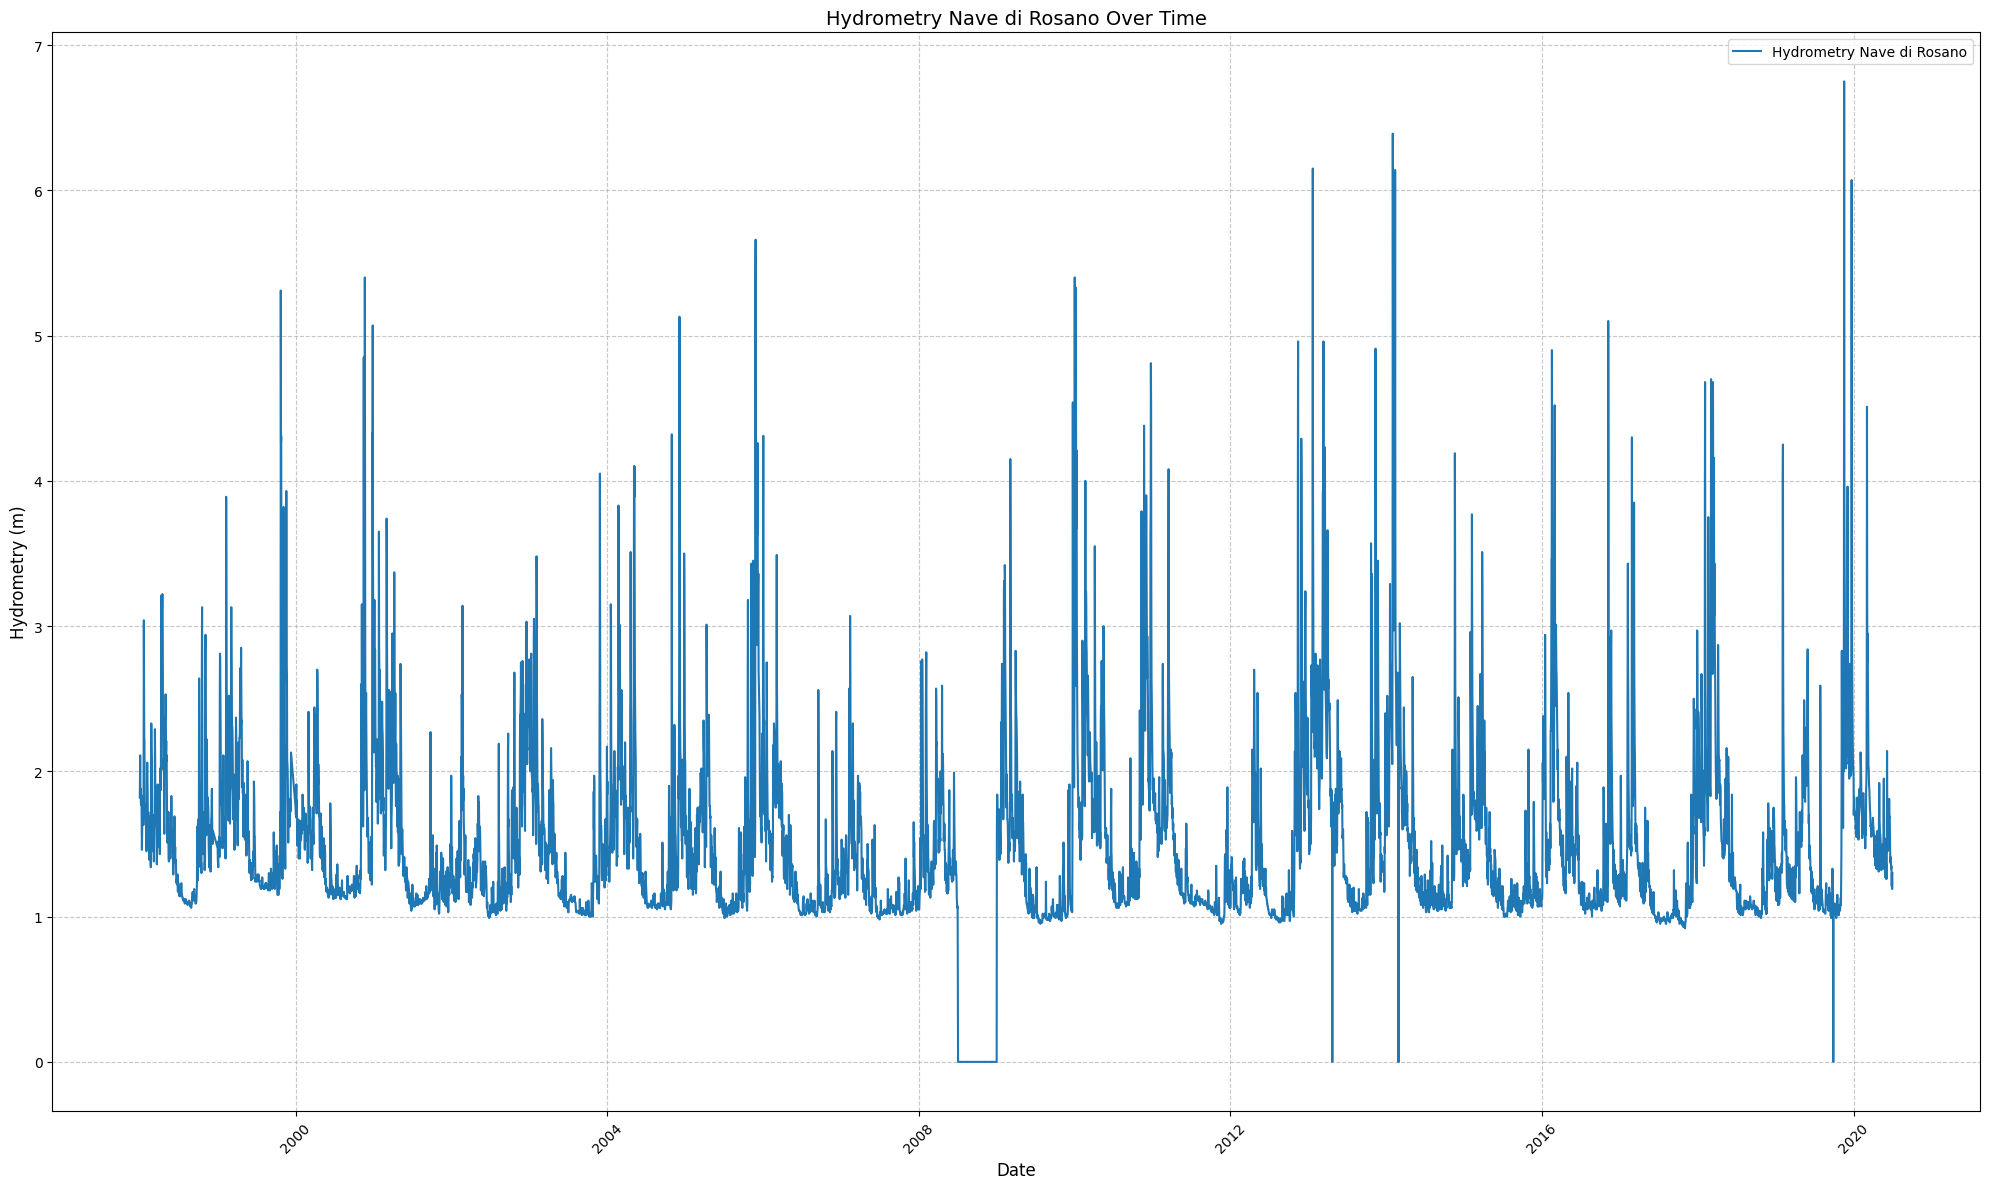

In [7]:

plt.figure(figsize=(20, 12))
plt.plot(df.index, df['Hydrometry_Nave_di_Rosano'], label='Hydrometry Nave di Rosano')

plt.title('Hydrometry Nave di Rosano Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hydrometry (m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

plt.show()

Am seeing some notable outlier points, e.g. a time span of approximately the latter half of 2008 where no measurements appear to have been recorded properly and they include only zeroes, or a few brief such instances of zeroes in later years.


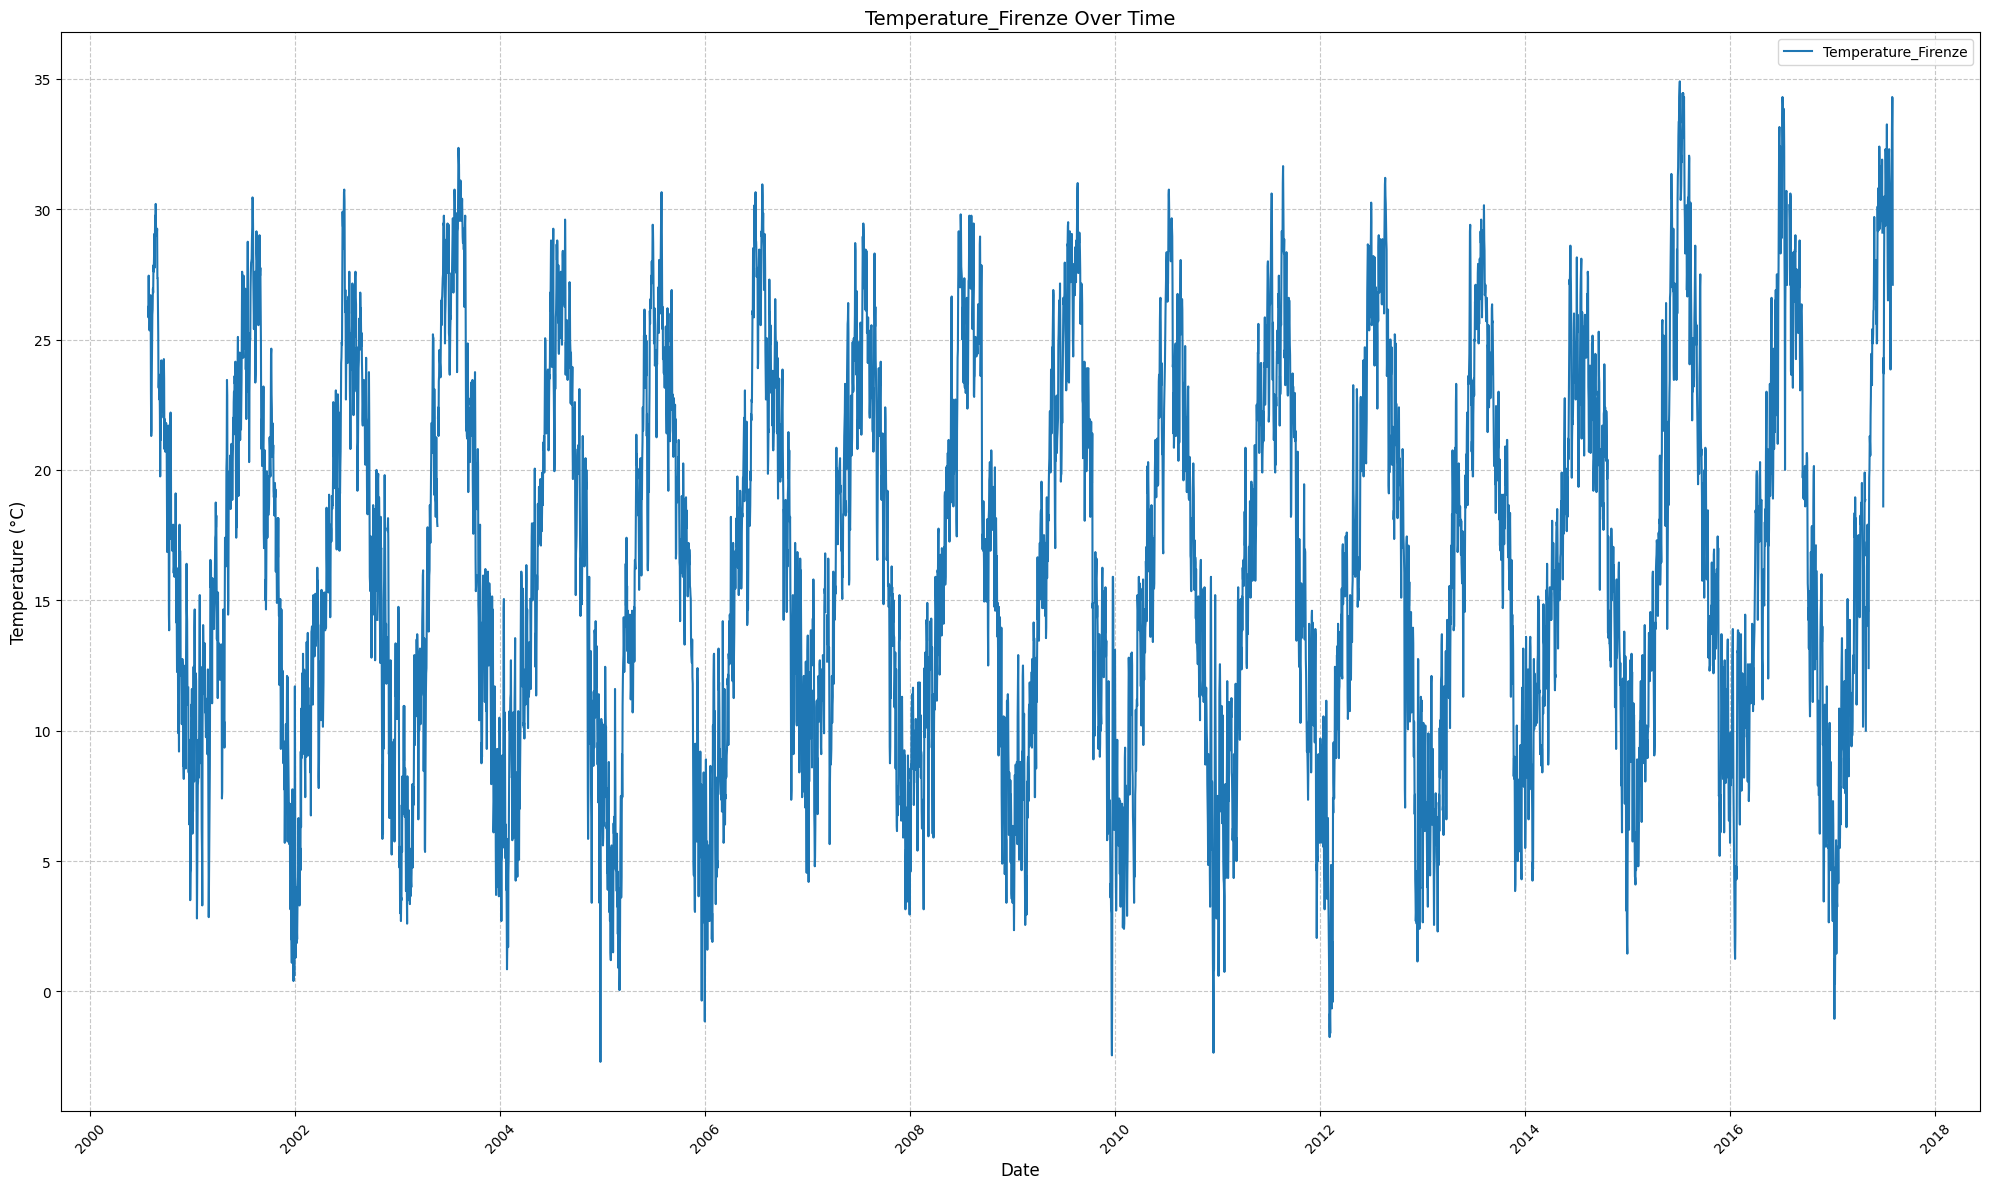

In [8]:
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['Temperature_Firenze'], label='Temperature_Firenze')

plt.title('Temperature_Firenze Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

plt.show()

Temperature looks much less prone to outright-missing data. Next am curious to check on a rainfall one...


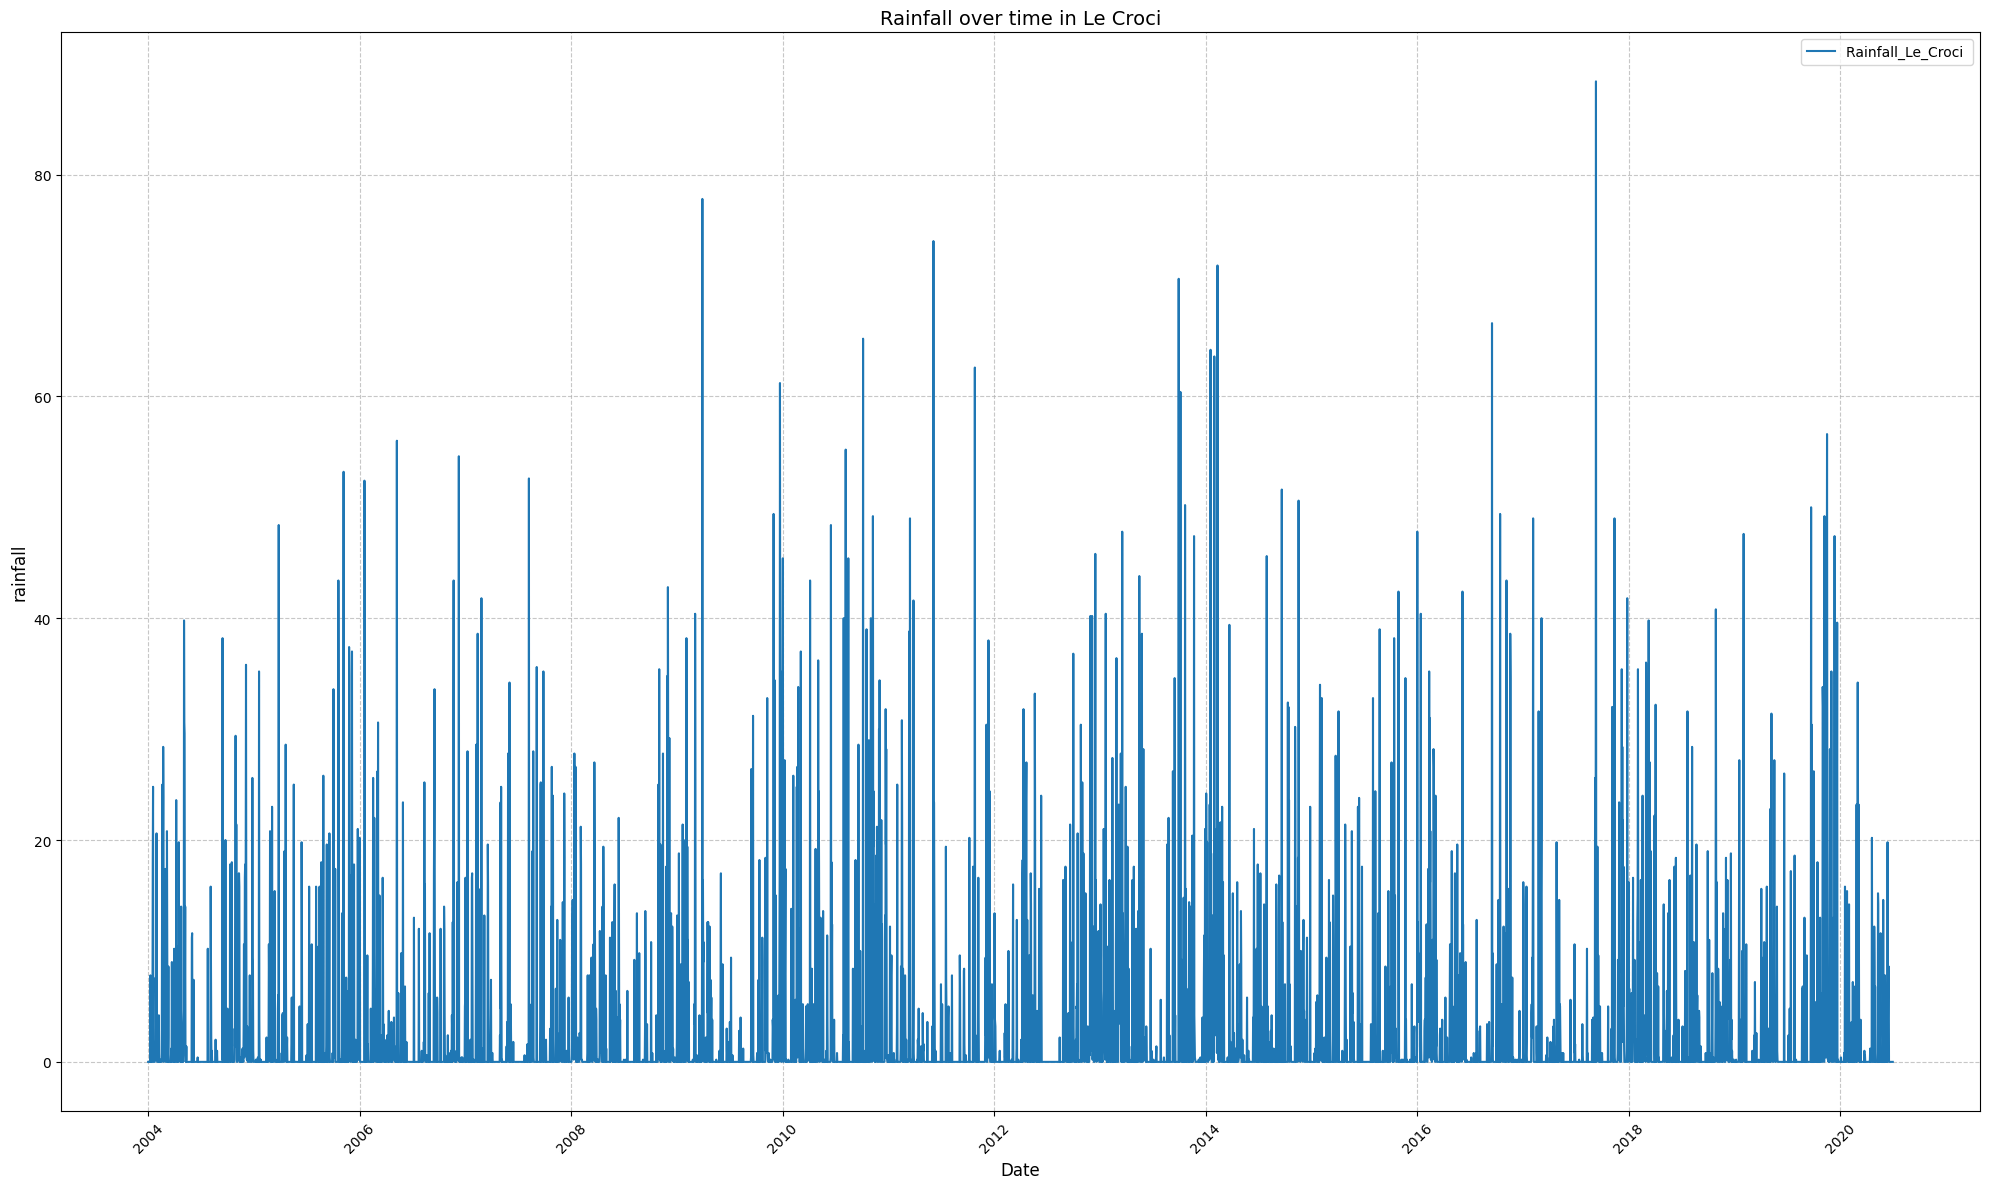

In [9]:
plt.figure(figsize=(20, 12))
plt.plot(df.index, df['Rainfall_Le_Croci'], label='Rainfall_Le_Croci ')

plt.title('Rainfall over time in Le Croci', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('rainfall', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

plt.show()

Most of the features are missing data, as many as hundreds or thousands of cells worth. And for each row where one's missing data, it's not necessarily predictable/consistent whether other columns are missing data in that same row or not.


In [10]:
df.isna().sum()

Rainfall_Le_Croci            2146
Rainfall_Cavallina           2146
Rainfall_S_Agata             2146
Rainfall_Mangona             2146
Rainfall_S_Piero             2146
Rainfall_Vernio              3888
Rainfall_Stia                6886
Rainfall_Consuma             6886
Rainfall_Incisa              3603
Rainfall_Montevarchi         6524
Rainfall_S_Savino            6886
Rainfall_Laterina            6886
Rainfall_Bibbiena            5793
Rainfall_Camaldoli           6886
Temperature_Firenze          1979
Hydrometry_Nave_di_Rosano       0
dtype: int64

Rather than replacing NaNs with zeroes for these features, it seems more realistic to interpolate between neighboring values.

Before dealing with missing data that way, though, I'd rather replace the zeroes we should treat the same way with NaN, so we'd be able to use the same interpolation method on all NaNs.


In [11]:
df.replace(0, np.nan, inplace=True)
df.isna().sum()


Rainfall_Le_Croci            5922
Rainfall_Cavallina           6267
Rainfall_S_Agata             5898
Rainfall_Mangona             5965
Rainfall_S_Piero             5822
Rainfall_Vernio              6552
Rainfall_Stia                7691
Rainfall_Consuma             7620
Rainfall_Incisa              6470
Rainfall_Montevarchi         7604
Rainfall_S_Savino            7649
Rainfall_Laterina            7728
Rainfall_Bibbiena            7294
Rainfall_Camaldoli           7629
Temperature_Firenze          1979
Hydrometry_Nave_di_Rosano     187
dtype: int64

I learned that df.interpolate() won't know what to do if the column starts with a NaN to begin with, so am going to backfill NaNs.


In [12]:
df.bfill(inplace=True)     # Backward fill for head NaNs
df.interpolate(method="time", inplace=True)

Finding water level trend:
We'll plot now that we've interpolated, decompose, then do a trend analysis:


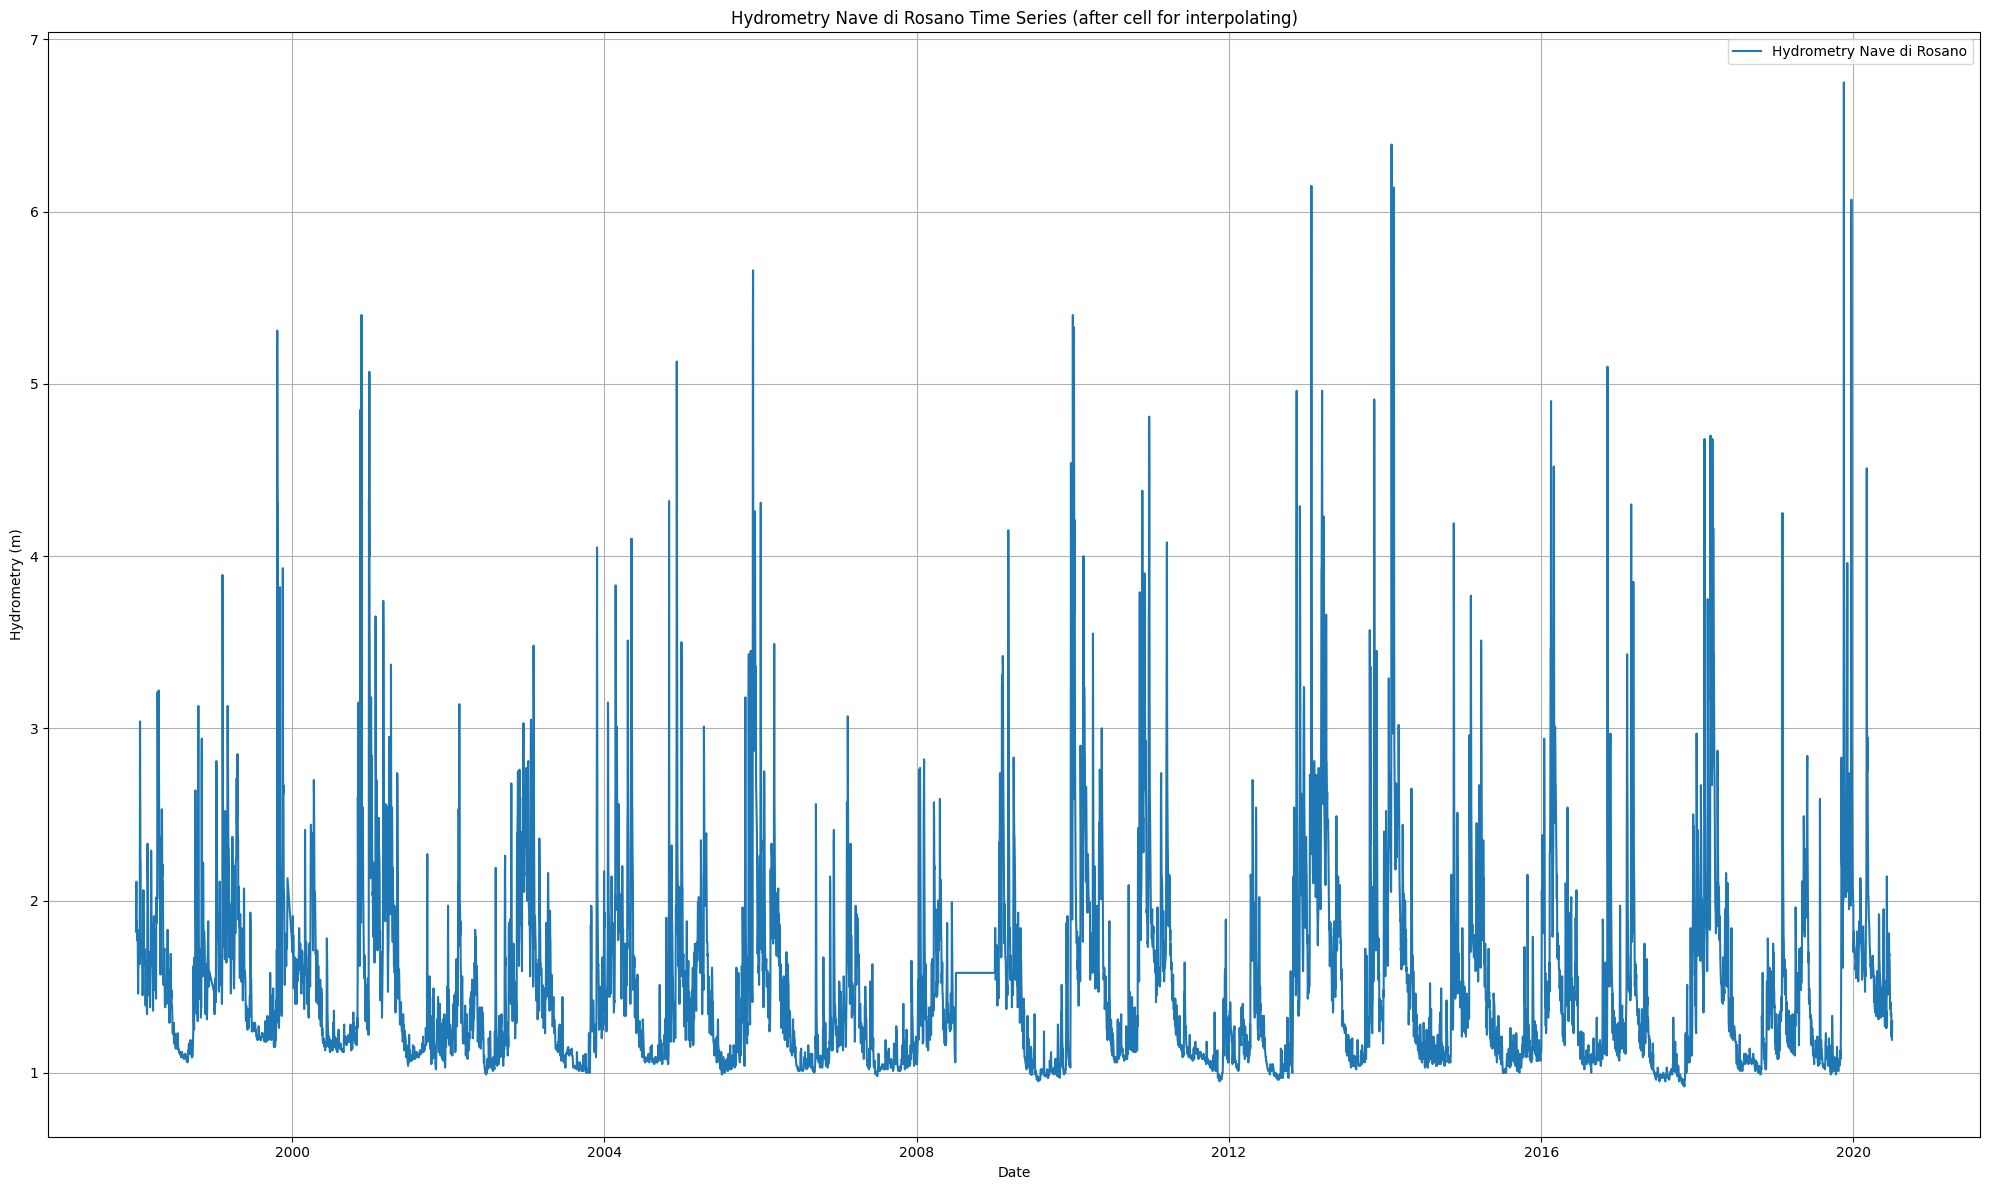

In [13]:

plt.figure(figsize=(20, 12))
plt.plot(df.index, df["Hydrometry_Nave_di_Rosano"], label="Hydrometry Nave di Rosano")
plt.title("Hydrometry Nave di Rosano Time Series (after cell for interpolating)")
plt.xlabel("Date")
plt.ylabel("Hydrometry (m)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df["Hydrometry_Nave_di_Rosano"], period=52)


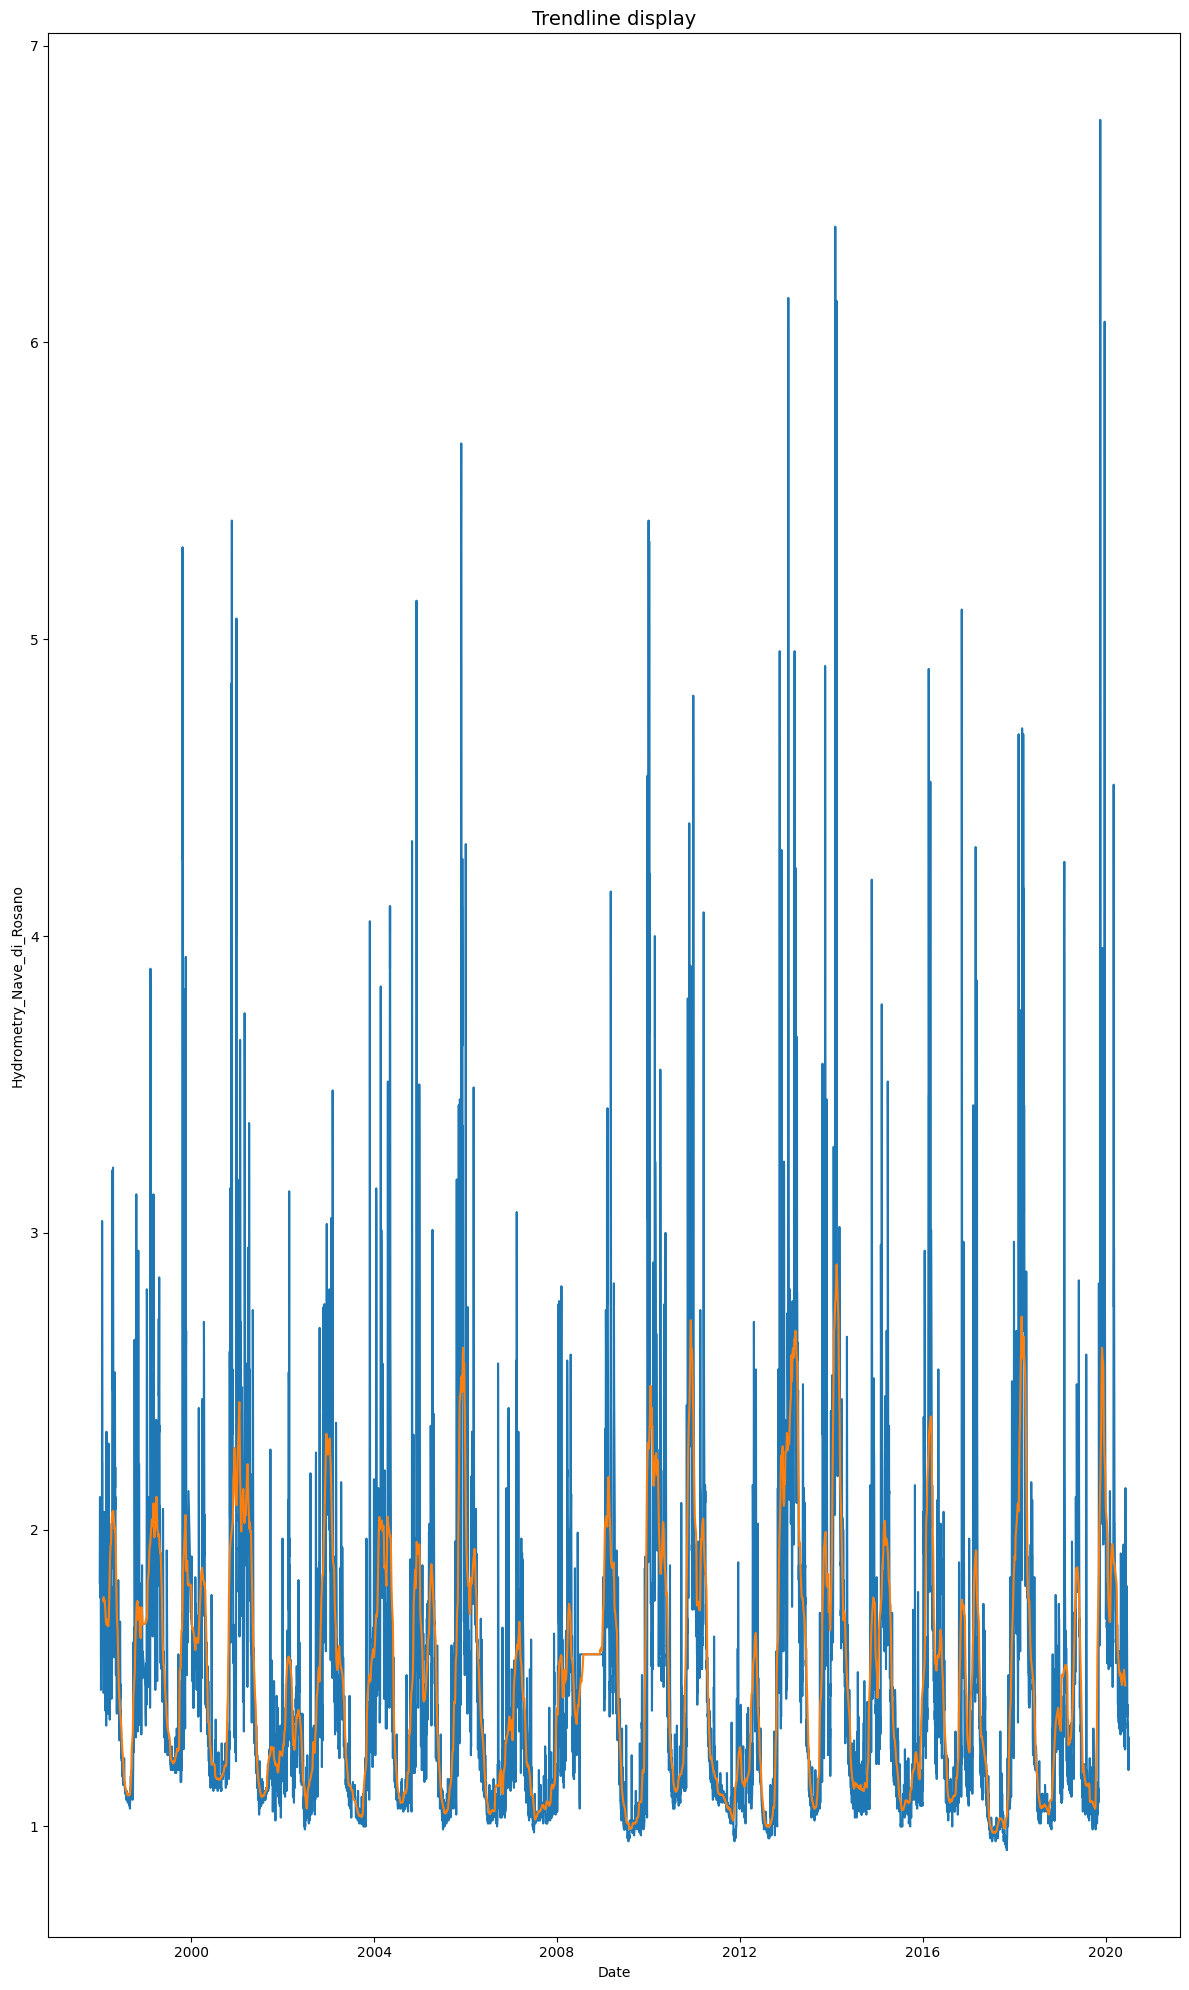

In [15]:
import seaborn as sns

trend = decomposition.trend

fig, axis = plt.subplots(figsize=(12, 20))

plt.title('Trendline display', fontsize=14)
sns.lineplot(data=df["Hydrometry_Nave_di_Rosano"])
sns.lineplot(data=trend)

plt.tight_layout()

plt.show()


In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df["Hydrometry_Nave_di_Rosano"], model="additive", period=52)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Calculate standard deviations
original_std = df["Hydrometry_Nave_di_Rosano"].std()
residual_std = residual.std()

print(f"Standard deviation of original series: {original_std}")
print(f"Standard deviation of residuals (noise): {residual_std}")
print(
    f"relative noise (percent residuals account for total variability): {100 * residual_std / original_std}%"
)


Standard deviation of original series: 0.5739456153317698
Standard deviation of residuals (noise): 0.3810273327940278
relative noise (percent residuals account for total variability): 66.38735842136795%


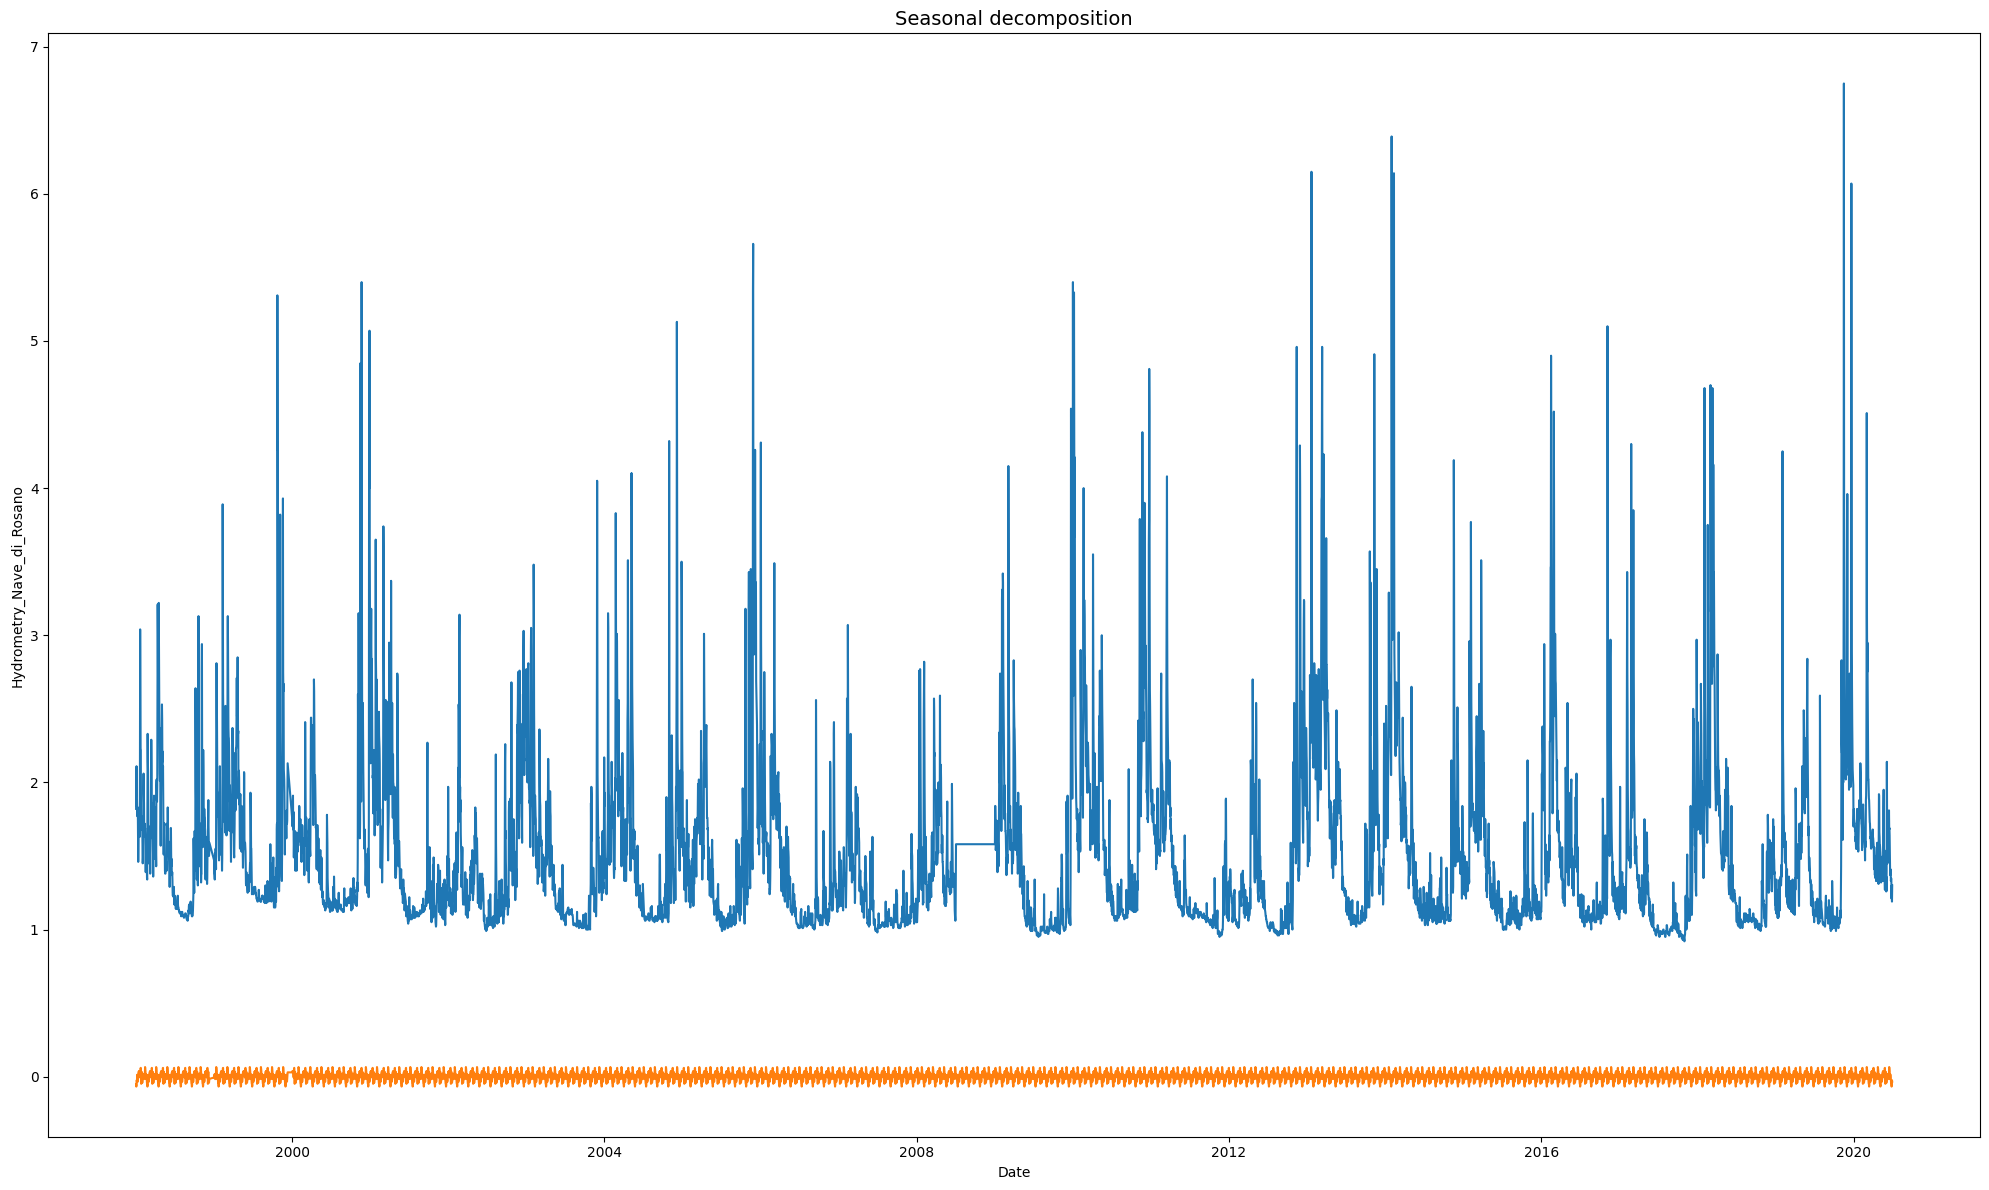

In [17]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(20, 12))

plt.title("Seasonal decomposition", fontsize=14)
sns.lineplot(data=df["Hydrometry_Nave_di_Rosano"])
sns.lineplot(data=seasonal)

plt.tight_layout()

plt.show()

In [18]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


test_stationarity(df["Hydrometry_Nave_di_Rosano"])

Dickey-Fuller test results:


Test Statistic                -8.235274e+00
p-value                        5.913194e-13
#Lags Used                     3.700000e+01
Number of Observations Used    8.131000e+03
Critical Value (1%)           -3.431154e+00
Critical Value (5%)           -2.861896e+00
Critical Value (10%)          -2.566959e+00
dtype: float64

Dickey-fuller p-value is smaller than 0.05, so the time series is stationary.


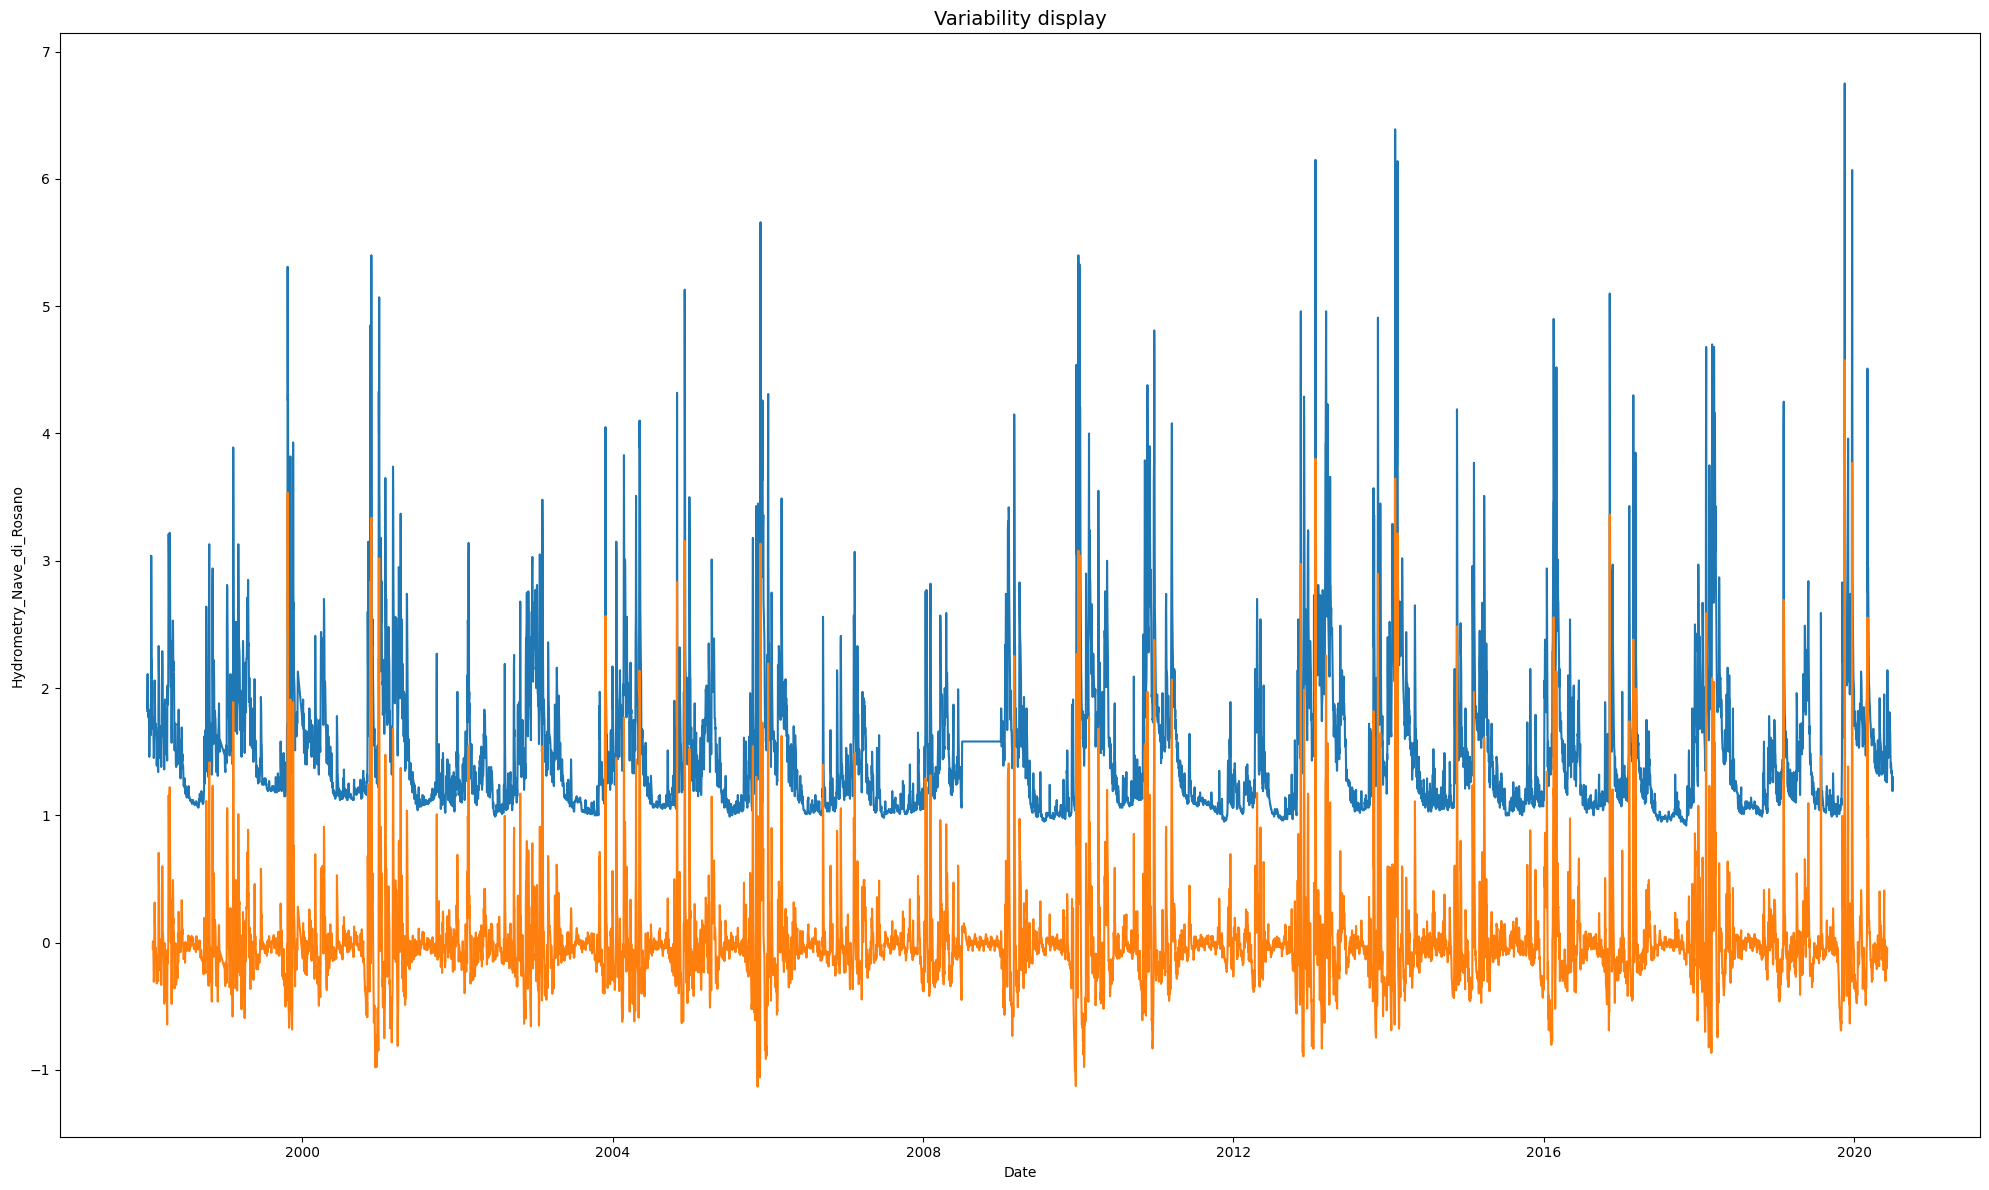

In [19]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize=(20, 12))

plt.title("Variability display", fontsize=14)
sns.lineplot(data=df["Hydrometry_Nave_di_Rosano"])
sns.lineplot(data=residual)

plt.tight_layout()

plt.show()

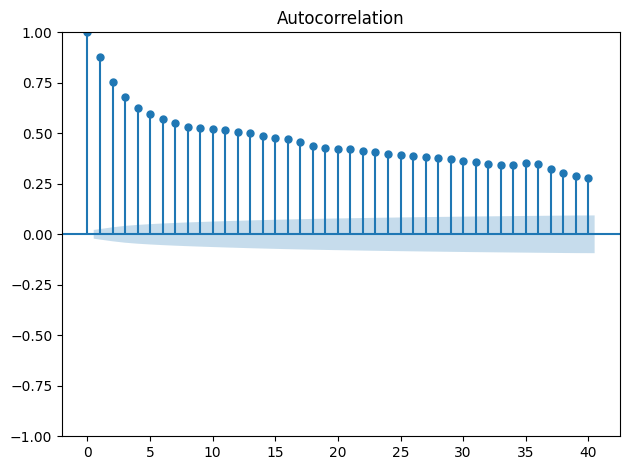

In [20]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Hydrometry_Nave_di_Rosano"])

plt.tight_layout()

plt.show()

There is a high correlation between the points and their delayed copies, which decreases with a long-tail skew over time.


## Train an ARIMA

The water level data is already stationary, so we can skip transforming it to become stationary for ARIMA.


In [21]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df['Hydrometry_Nave_di_Rosano'], order=(20,0,1))
results = model.fit()

# Print summary
print(results.summary())


c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

                                   SARIMAX Results                                   
Dep. Variable:     Hydrometry_Nave_di_Rosano   No. Observations:                 8169
Model:                       ARIMA(20, 0, 1)   Log Likelihood                -755.381
Date:                       Tue, 27 May 2025   AIC                           1556.761
Time:                               17:43:40   BIC                           1717.948
Sample:                                    0   HQIC                          1611.875
                                      - 8169                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5196      0.088     17.211      0.000       1.347       1.693
ar.L1          1.5149      0.210      7.203      0.000       1.103       1.

In [22]:
forecast = results.forecast(356)
forecast

c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Nick\git\kaggle-acea-water-prediction\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


8169    1.368104
8170    1.373906
8171    1.386588
8172    1.385630
8173    1.398116
          ...   
8520    1.519588
8521    1.519589
8522    1.519590
8523    1.519591
8524    1.519592
Name: predicted_mean, Length: 356, dtype: float64

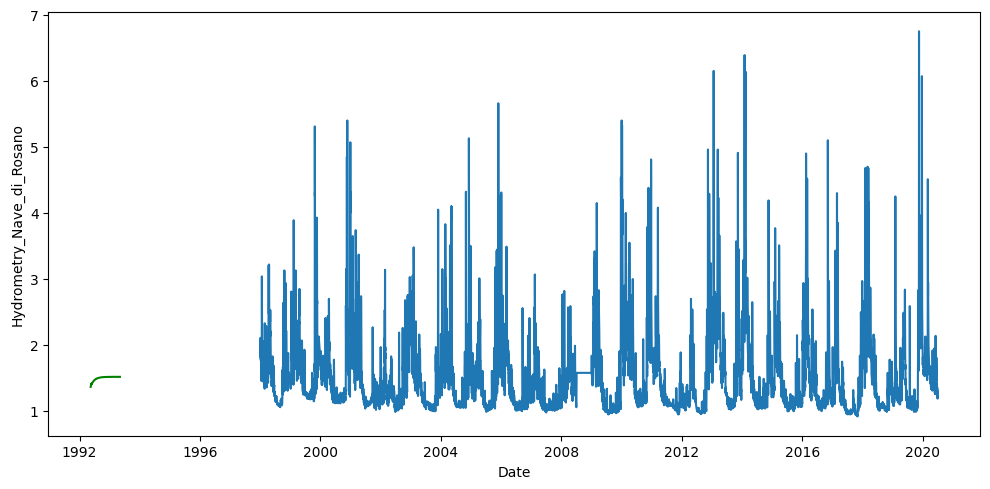

In [23]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 5))

sns.lineplot(data=df["Hydrometry_Nave_di_Rosano"])
sns.lineplot(data=forecast, c="green")

plt.tight_layout()

plt.show()

### Trying out FB Prophet


In [24]:
from prophet import Prophet

# prophet demands that we have a ds column, so let's reset the DatetimeIndex back to being a column:
df.reset_index(inplace=True)  # Brings 'Date' back as a column

regressors = [feature for feature in features if feature not in ['Date', 'Hydrometry_Nave_di_Rosano']]

df_prophet = df[['Date', 'Hydrometry_Nave_di_Rosano'] + regressors].copy()
df_prophet.rename(columns={'Date': 'ds', 'Hydrometry_Nave_di_Rosano': 'y'}, inplace=True)


In [25]:
prophet_model = Prophet()

for reg in regressors:
    prophet_model.add_regressor(reg)


In [26]:
prophet_model.fit(df_prophet)


17:43:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:01 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
# Create future dataframe
YEARS_TO_FORECAST=5
future = prophet_model.make_future_dataframe(periods=YEARS_TO_FORECAST*365)


# Step 2: Fill regressors into the future because it won't accept NaNs
df_regressors = df_prophet.set_index('ds')

for reg in regressors:
    series_extended = (
        df_regressors[reg]
        .reindex(future['ds'])  # align future dates
        .interpolate(method='time')  # fill internal gaps
        .bfill()  # fill start
        .ffill()  # fill end
    )

    # Final fallback for edge-case NaNs
    if series_extended.isna().any():
        series_extended = series_extended.fillna(series_extended.mean())

    future[reg] = series_extended.values

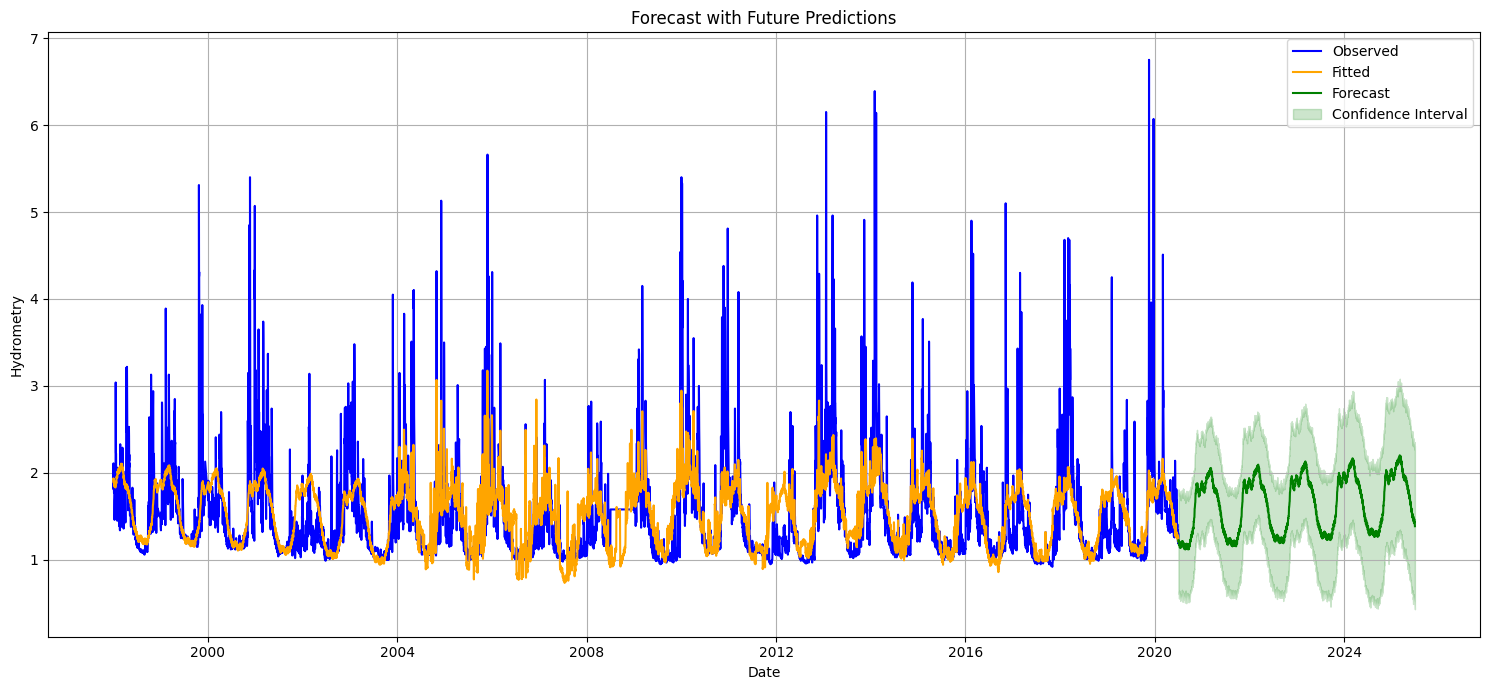

In [28]:
forecast = prophet_model.predict(future)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Plot actual data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed', color='blue')

# Plot in-sample forecast
plt.plot(forecast['ds'][:len(df_prophet)], forecast['yhat'][:len(df_prophet)], label='Fitted', color='orange')

# Plot future forecast in green
plt.plot(forecast['ds'][len(df_prophet):], forecast['yhat'][len(df_prophet):], label='Forecast', color='green')

# Optionally: add confidence interval for future
plt.fill_between(forecast['ds'][len(df_prophet):],
                 forecast['yhat_lower'][len(df_prophet):],
                 forecast['yhat_upper'][len(df_prophet):],
                 color='green', alpha=0.2, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Hydrometry')
plt.title('Forecast with Future Predictions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


That predicts into the future assuming simplified future rainfall values, but next am curious to try predicting what future rainfall values will be, then using those as our future regressor data...


In [29]:
def forecast_feature(df, col, horizon):
    model = Prophet()
    temp_df = df[['Date', col]].rename(columns={'Date': 'ds', col: 'y'})
    model.fit(temp_df)
    future = model.make_future_dataframe(periods=horizon)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat']].rename(columns={'yhat': col})


In [30]:
from functools import reduce



# merge the forecasted regressors on their ds (date) columns
future_regressors = reduce(lambda left, right: pd.merge(left, right, on='ds'),
                           [forecast_feature(df, col, YEARS_TO_FORECAST*365) for col in regressors])


17:44:09 - cmdstanpy - INFO - Chain [1] start processing
17:44:10 - cmdstanpy - INFO - Chain [1] done processing
17:44:15 - cmdstanpy - INFO - Chain [1] start processing
17:44:19 - cmdstanpy - INFO - Chain [1] done processing
17:44:23 - cmdstanpy - INFO - Chain [1] start processing
17:44:27 - cmdstanpy - INFO - Chain [1] done processing
17:44:32 - cmdstanpy - INFO - Chain [1] start processing
17:44:35 - cmdstanpy - INFO - Chain [1] done processing
17:44:40 - cmdstanpy - INFO - Chain [1] start processing
17:44:43 - cmdstanpy - INFO - Chain [1] done processing
17:44:48 - cmdstanpy - INFO - Chain [1] start processing
17:44:51 - cmdstanpy - INFO - Chain [1] done processing
17:44:55 - cmdstanpy - INFO - Chain [1] start processing
17:45:02 - cmdstanpy - INFO - Chain [1] done processing
17:45:07 - cmdstanpy - INFO - Chain [1] start processing
17:45:15 - cmdstanpy - INFO - Chain [1] done processing
17:45:20 - cmdstanpy - INFO - Chain [1] start processing
17:45:23 - cmdstanpy - INFO - Chain [1]

In [31]:
future_predicted_df = prophet_model.make_future_dataframe(periods=YEARS_TO_FORECAST*365)
future_predicted_df = future_predicted_df.merge(future_regressors, on='ds', how='left')
future_predicted_df = future_predicted_df.bfill().ffill()


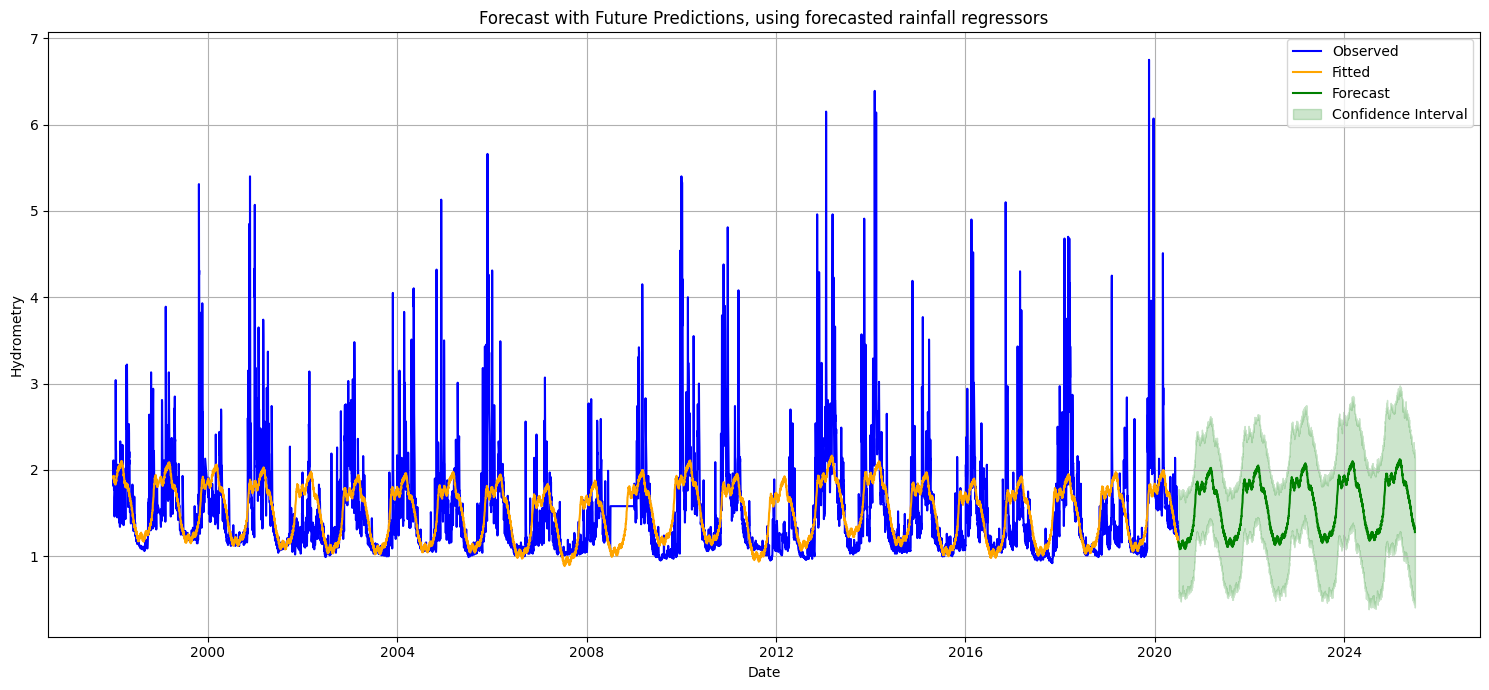

In [32]:
forecasted_non_simplified_rainfall = prophet_model.predict(future_predicted_df)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

# Plot actual data
plt.plot(df_prophet['ds'], df_prophet['y'], label='Observed', color='blue')

# Plot in-sample forecast
plt.plot(forecasted_non_simplified_rainfall['ds'][:len(df_prophet)], forecasted_non_simplified_rainfall['yhat'][:len(df_prophet)], label='Fitted', color='orange')

# Plot future forecast in green
plt.plot(forecasted_non_simplified_rainfall['ds'][len(df_prophet):], forecasted_non_simplified_rainfall['yhat'][len(df_prophet):], label='Forecast', color='green')

# Optionally: add confidence interval for future
plt.fill_between(forecasted_non_simplified_rainfall['ds'][len(df_prophet):],
                 forecasted_non_simplified_rainfall['yhat_lower'][len(df_prophet):],
                 forecasted_non_simplified_rainfall['yhat_upper'][len(df_prophet):],
                 color='green', alpha=0.2, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Hydrometry')
plt.title('Forecast with Future Predictions, using forecasted rainfall regressors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This looks like a more-stationary instead of every-so-slightly increasing trended forecast compared to the one with simplified rainfall regressors..


# Similar methodology towards analyzing Lake Data


In [69]:
lake_df = pd.read_csv("../data/raw/lake_Bilancino.csv", sep=",")

lake_df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [70]:
lake_df.shape

(6603, 9)

In [71]:
lake_df = lake_df[lake_df.Lake_Level.notna()].reset_index(drop=True)
lake_df.shape

(6603, 9)

Lake target variable is Lake_Level


In [72]:
lake_target = ["Lake_Level"]
lake_features = [col for col in lake_df.columns if col not in lake_target]

print(lake_features)

['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci', 'Flow_Rate']


Most of the features are rainfall.

I do see a "Flow\*Rate" feature not present in earlier-discussed river data. My understanding of this from the data dictionary is that it is the flow rate of the lake _into the Arno river_, which would make for another interesting future-regressor input into the above river model.


In [73]:
lake_df['Date'] = pd.to_datetime(lake_df['Date'], dayfirst=True) # setting dayfirst=True appears more compatible with Prophet than setting format = '%d/%m/%Y') 
lake_df.set_index('Date', inplace=True) # if we stuck with integer index instead of DatetimeIndex, then a later time-based interpolation would error

lake_df.head()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
Date,,,,,,,,
2002-06-03,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-04,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-05,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2002-06-07,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


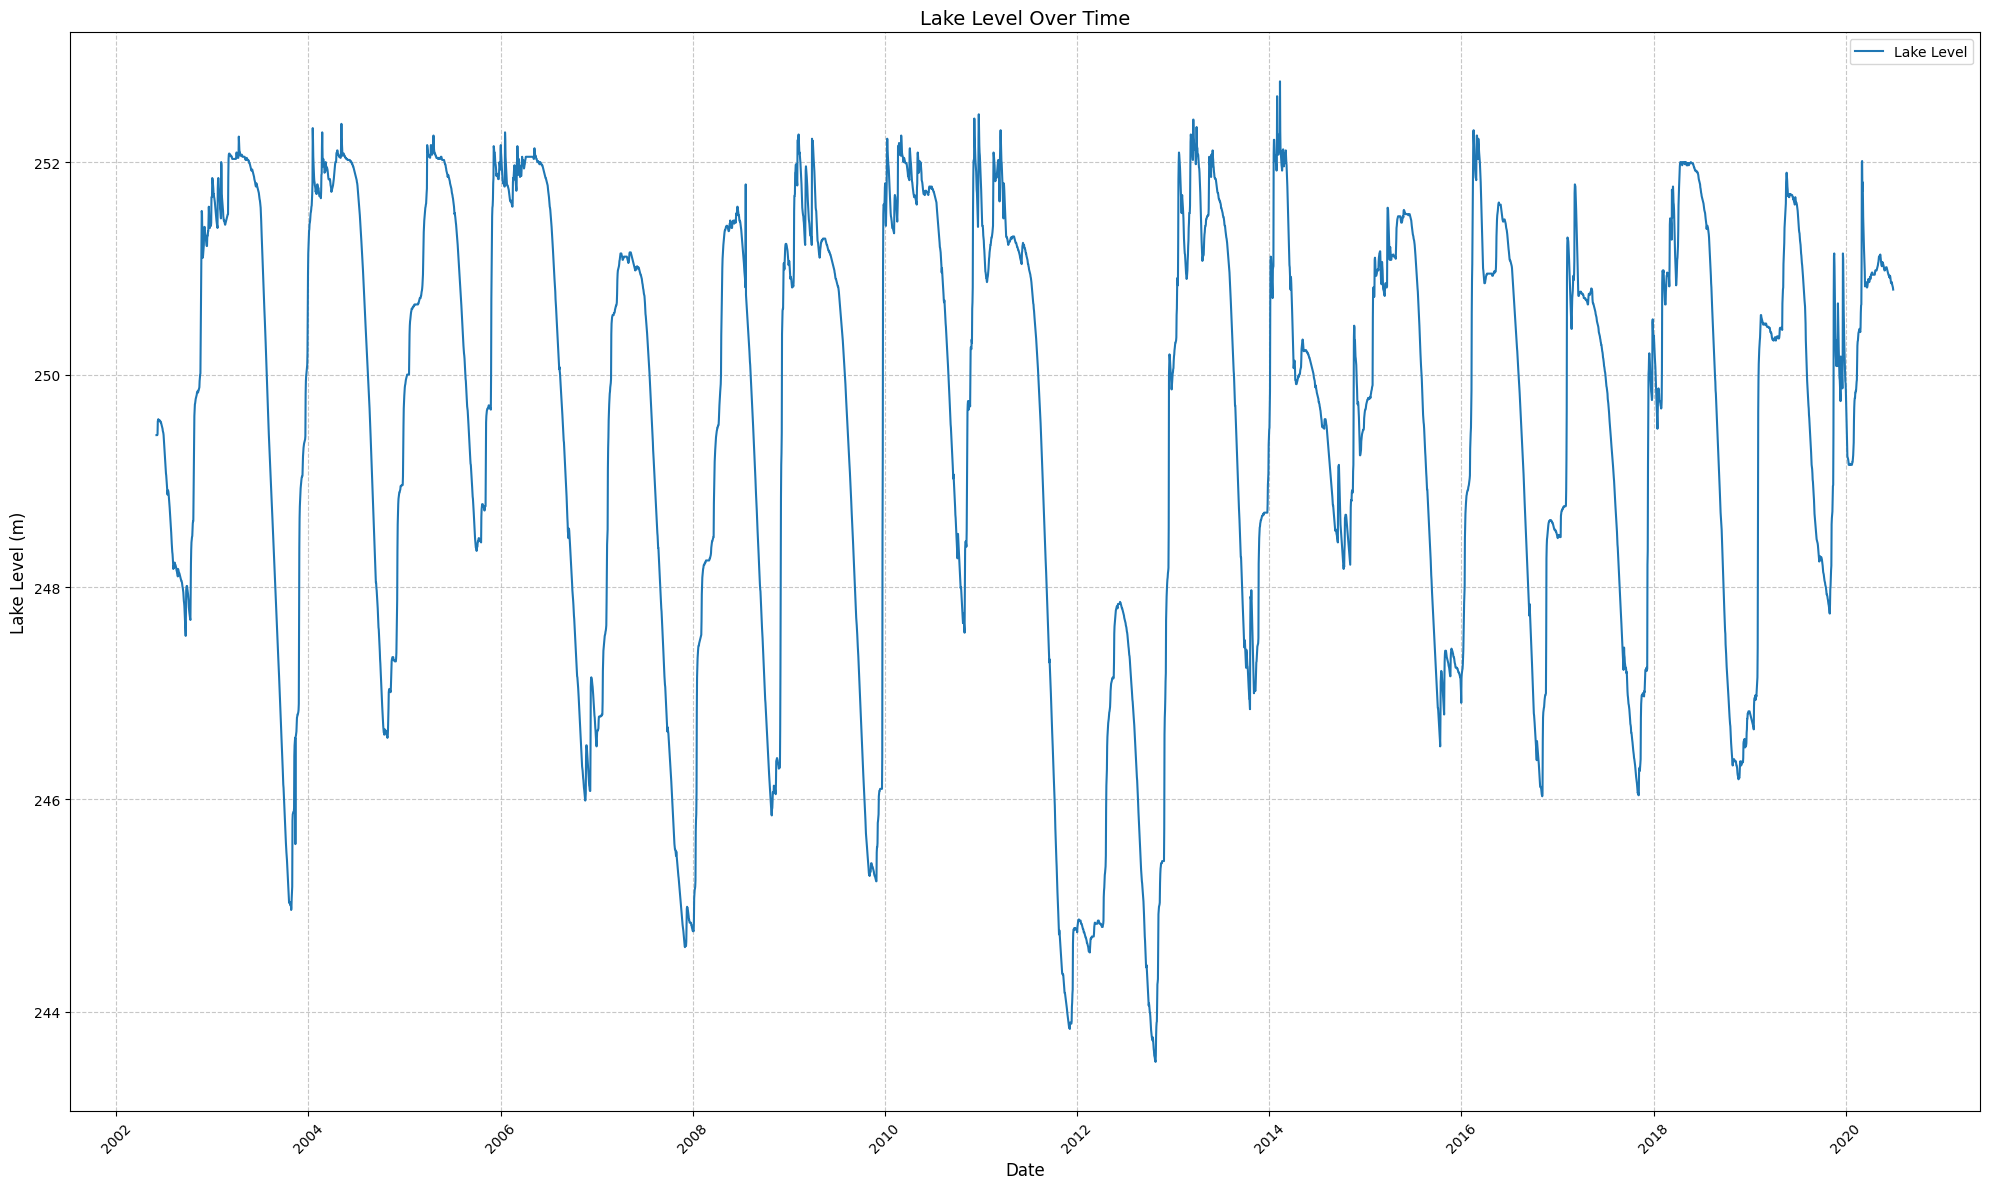

In [74]:
plt.figure(figsize=(20, 12))
plt.plot(lake_df.index, lake_df['Lake_Level'], label='Lake Level')

plt.title('Lake Level Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Lake Level (m)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.legend()

plt.tight_layout()

plt.show()

I don't see any so-obvious missing data points from this like we saw in the river data. I do see that from late 2011 to late 2012 the water level was unusually low, but that timeframe doesn't correspond to the zeroed-out years on the river data, so I don't think the river was literally empty from the utility company deciding not to let the lake flow into the river during years the lake itself was lower.


In [75]:
lake_df.isna().sum()

Rainfall_S_Piero        577
Rainfall_Mangona        577
Rainfall_S_Agata        577
Rainfall_Cavallina      577
Rainfall_Le_Croci       577
Temperature_Le_Croci    578
Lake_Level                0
Flow_Rate                21
dtype: int64

Am again going to replace zeroes with NaNs so we can then interpolate NaNs


In [76]:
lake_df.replace(0, np.nan, inplace=True)
lake_df.isna().sum()

Rainfall_S_Piero        4256
Rainfall_Mangona        4399
Rainfall_S_Agata        4332
Rainfall_Cavallina      4701
Rainfall_Le_Croci       4356
Temperature_Le_Croci     579
Lake_Level                 0
Flow_Rate                 21
dtype: int64

In [77]:
lake_df.interpolate(method="time", inplace=True)

It works out of the box, which tells me that in this data (unlike the river data) we don't have any rows whose data started with NaN (or zeroes-turned-NaNs) in need of backfilling.

We just showed that the Lake_Level data has a total of zero NaN values, so there's no point in re-plotting it the same way, it'll look the same as before interpolating.

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(lake_df["Lake_Level"], period=52)


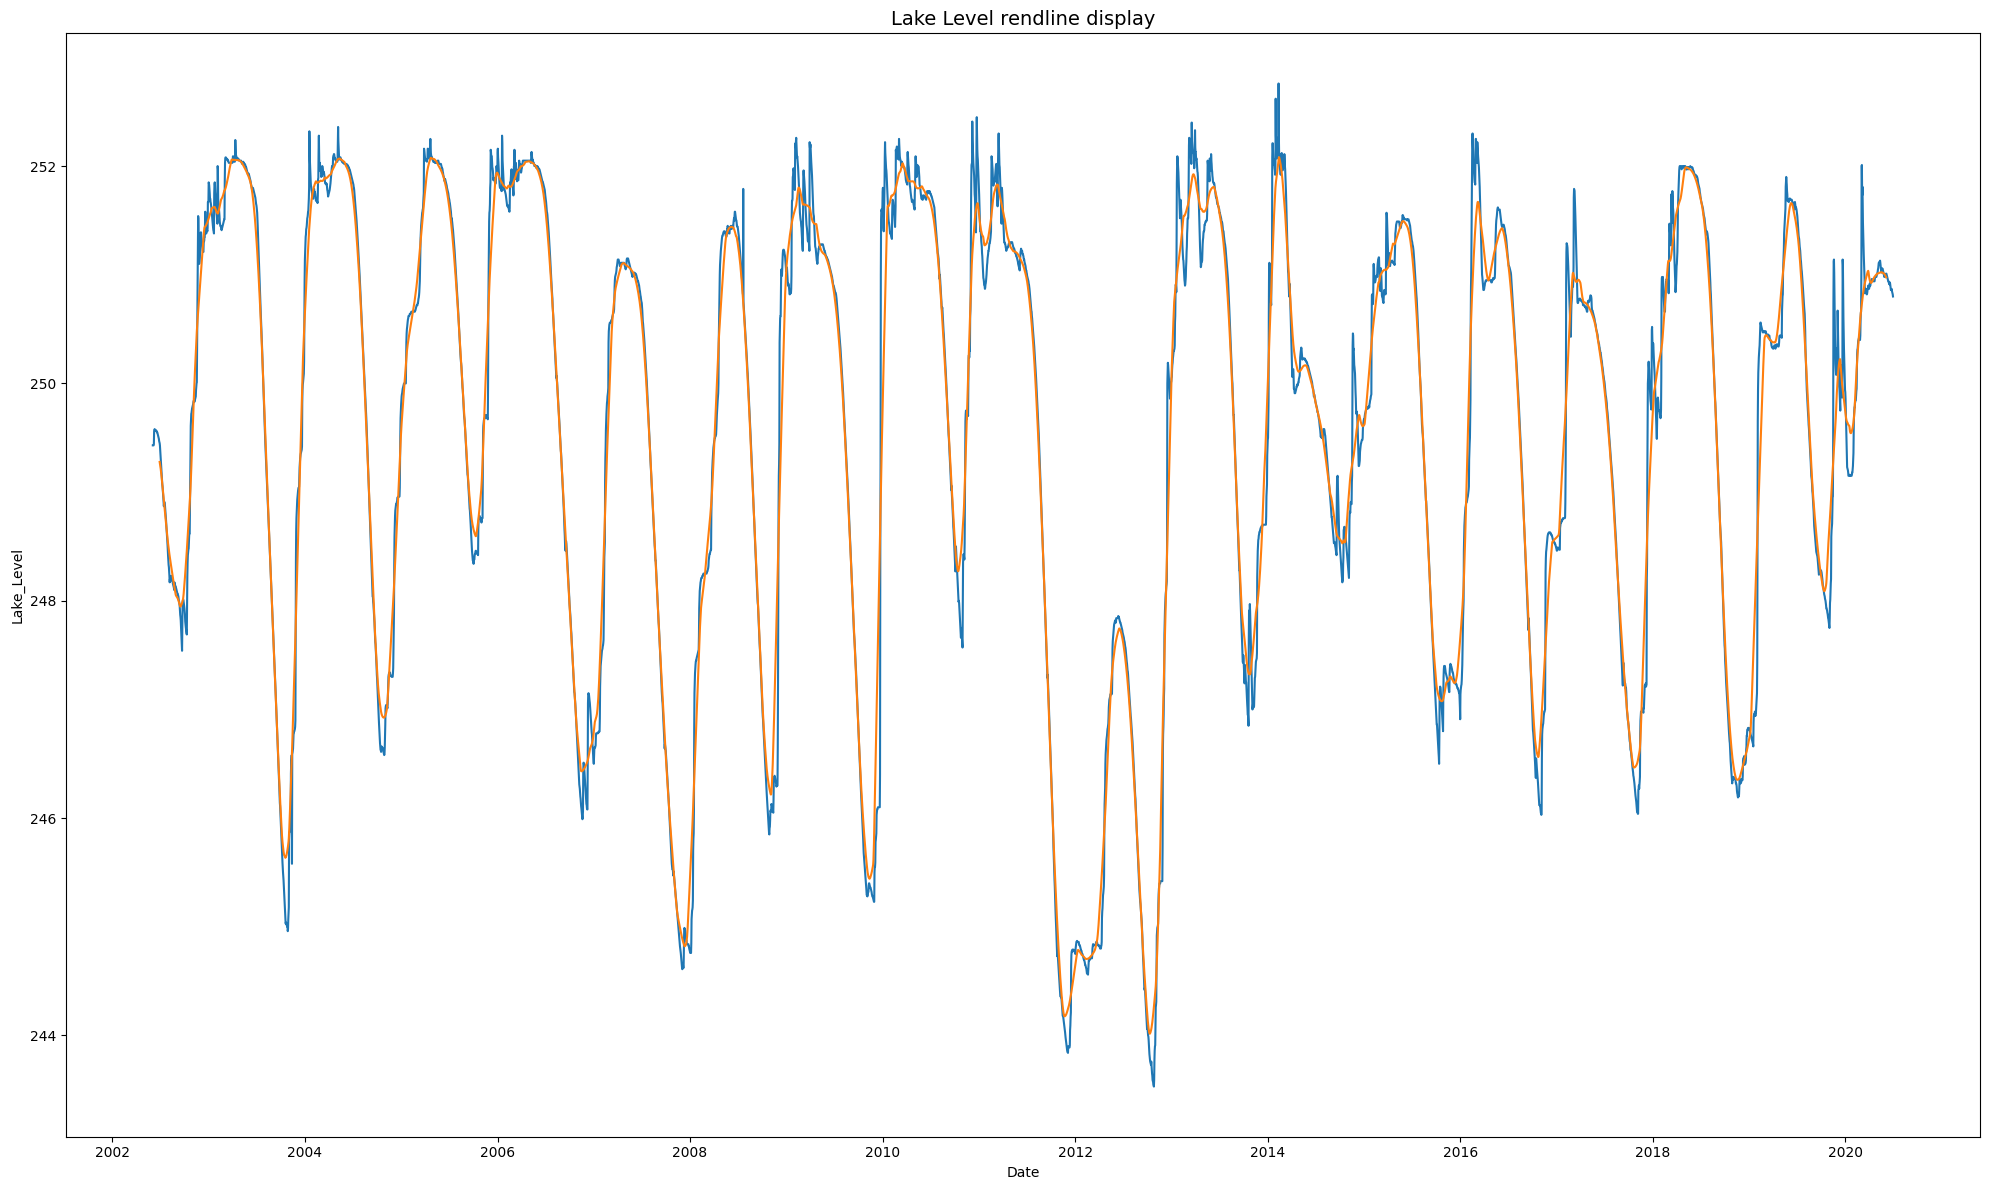

In [ ]:

import seaborn as sns

trend = decomposition.trend

fig, axis = plt.subplots(figsize=(20, 12))

plt.title('Lake Level trendline display', fontsize=14)
sns.lineplot(data=lake_df["Lake_Level"])
sns.lineplot(data=trend)

plt.tight_layout()

plt.show()

The above indicates how much teh actual lake level deviates from combined trend and seasonal components.

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(lake_df["Lake_Level"], model="additive", period=52)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Calculate standard deviations
original_std = lake_df["Lake_Level"].std()
residual_std = residual.std()

print(f"Standard deviation of original series: {original_std}")
print(f"Standard deviation of residuals (noise): {residual_std}")
print(
    f"relative noise (percent residuals account for total variability): {100 * residual_std / original_std}%"
)

Standard deviation of original series: 2.1725581066396282
Standard deviation of residuals (noise): 0.3192342509124033
relative noise (percent residuals account for total variability): 14.693933844014609%


Lake data's relative noise level is about four times less noisy than the river hydrometry data.

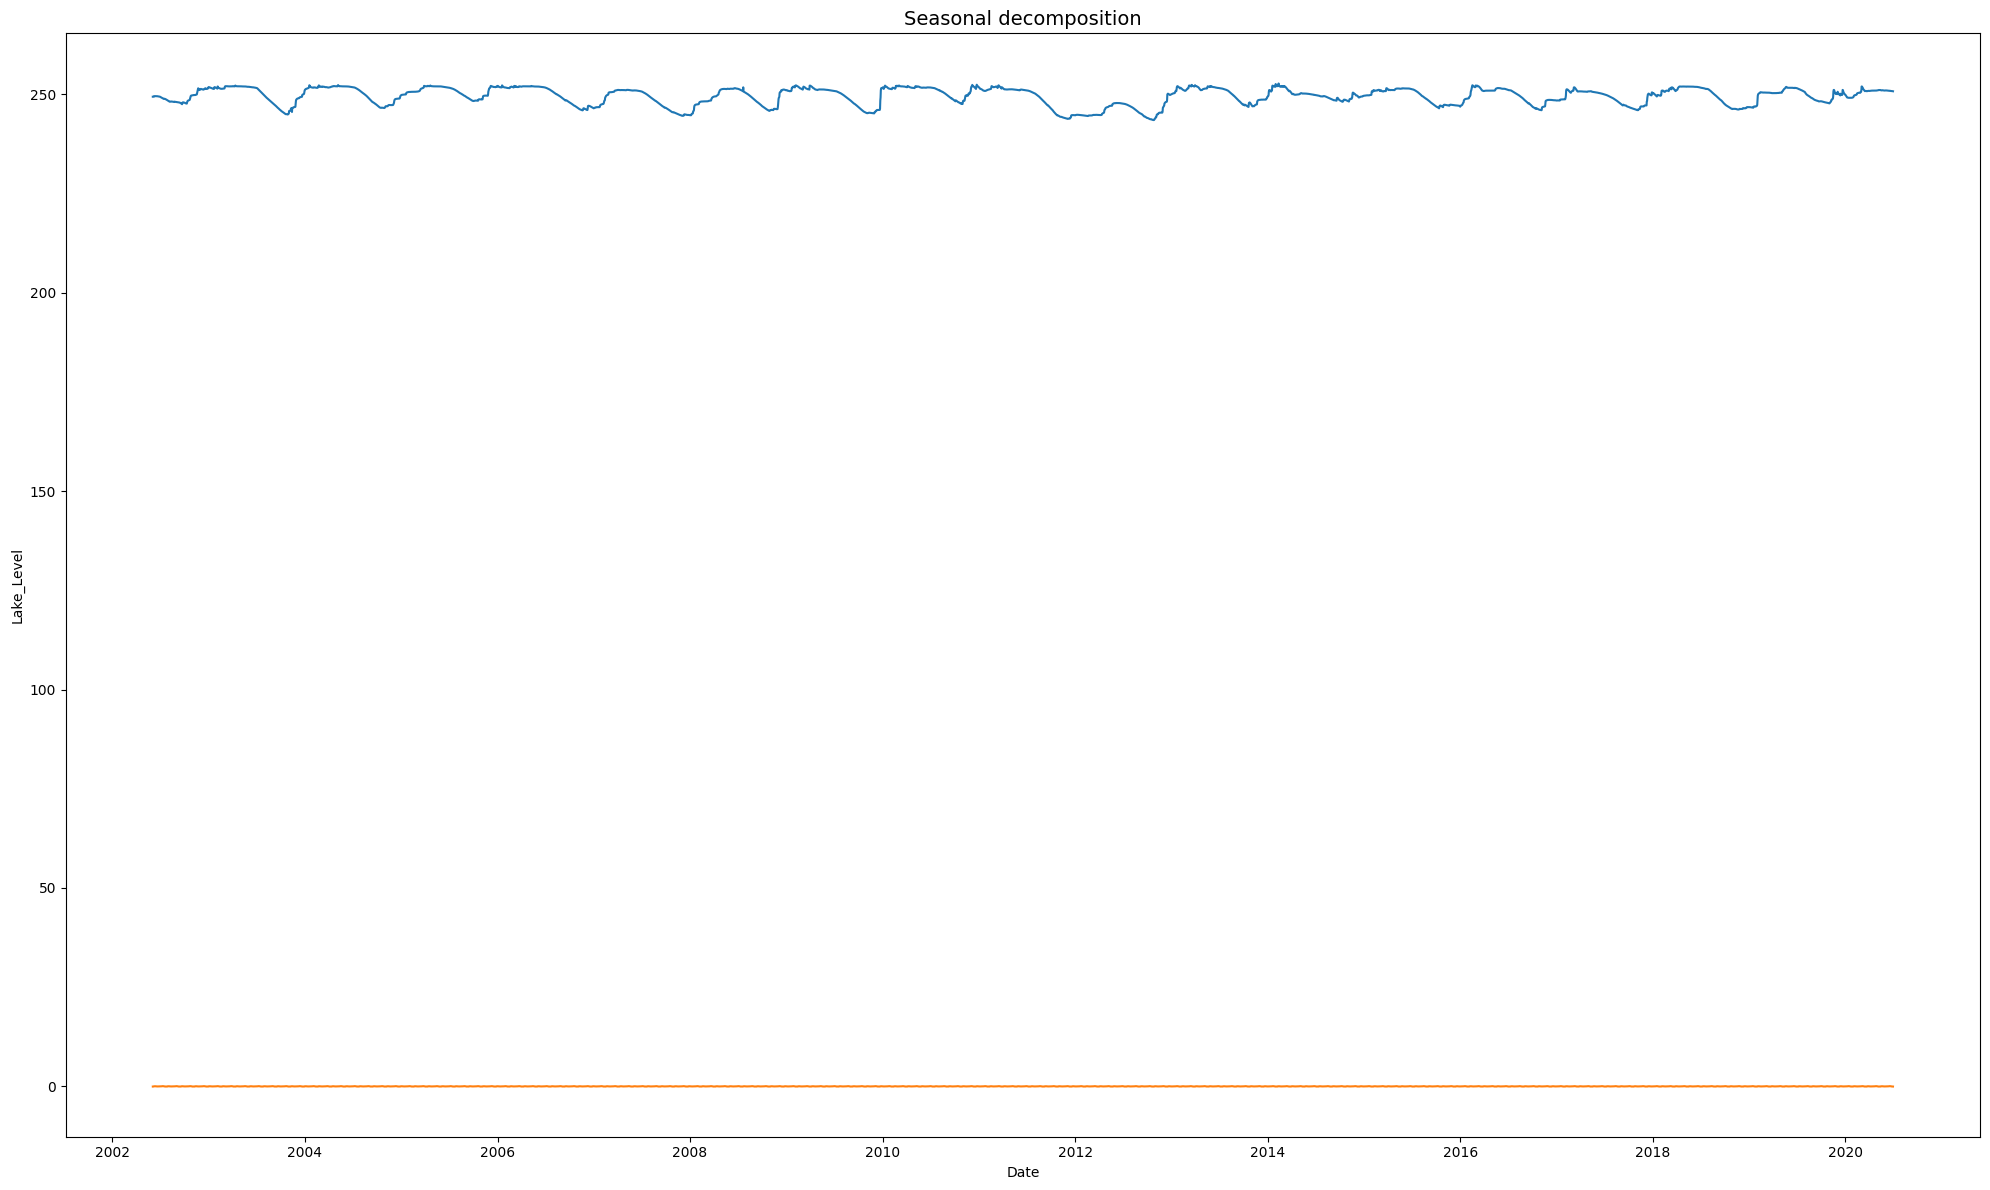

In [ ]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize=(20, 12))

plt.title("Lake Level Seasonal Decomposition", fontsize=14)
sns.lineplot(data=lake_df["Lake_Level"])
sns.lineplot(data=seasonal)

plt.tight_layout()

plt.show()

In [88]:
#Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller


def test_stationarity(timeseries):
    print("Dickey-Fuller test results against lake data:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput


test_stationarity(lake_df["Lake_Level"])

Dickey-Fuller test results against lake data:


Test Statistic                -6.880991e+00
p-value                        1.433634e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.567000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64

Dickey-Fuller P-value is smaller than 0.05, so the lake data is stationary.

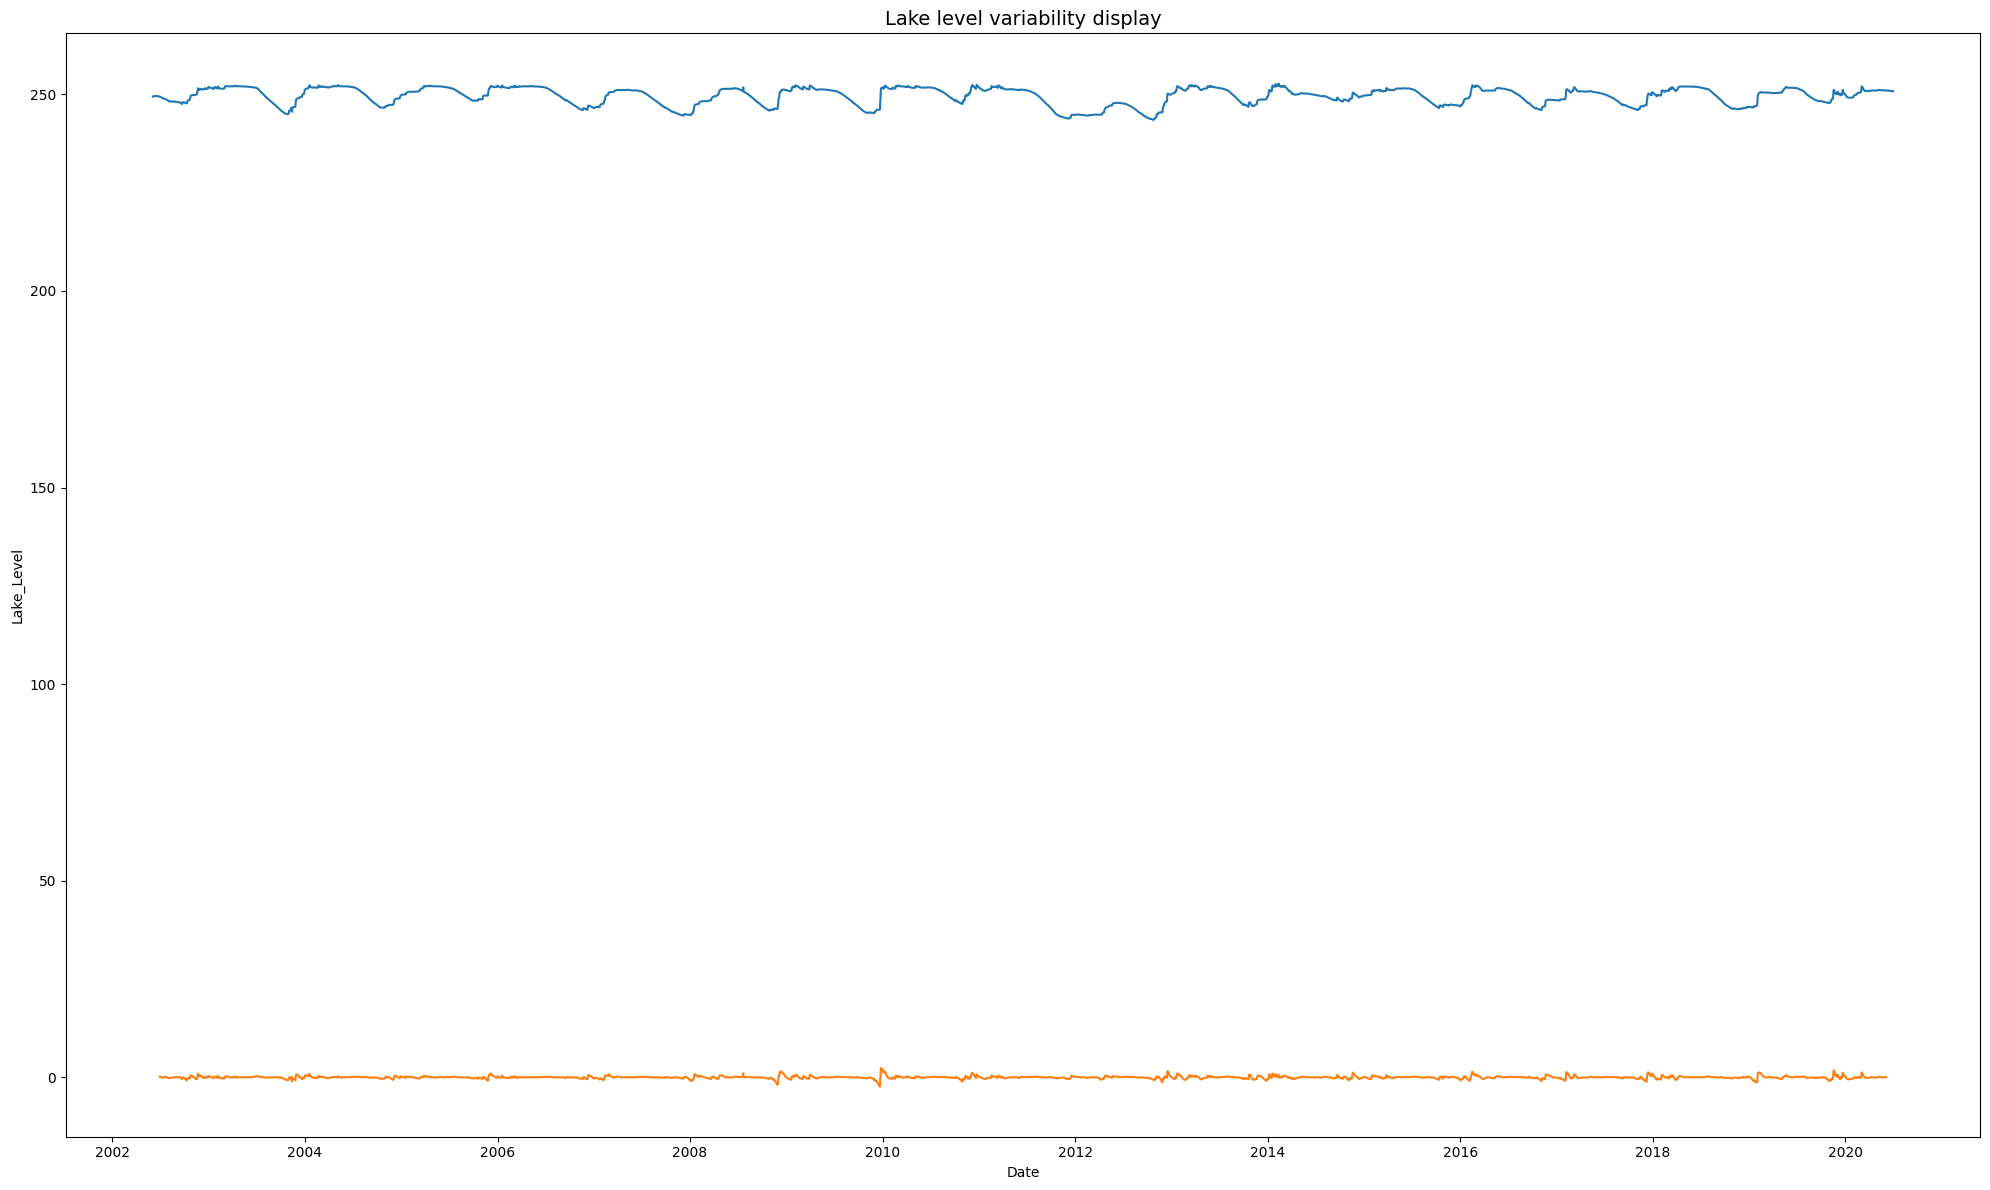

In [89]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize=(20, 12))

plt.title("Lake level variability display", fontsize=14)
sns.lineplot(data=lake_df["Lake_Level"])
sns.lineplot(data=residual)

plt.tight_layout()

plt.show()

The blue line of this plot is the seasonal rise and fall in lake level.  The orange line of this plot is the residual, i.e. the diff between actual vs. trend.

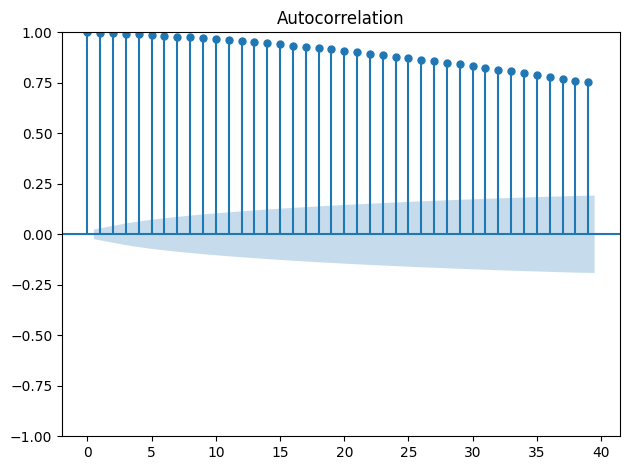

In [90]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(lake_df["Lake_Level"])

plt.tight_layout()

plt.show()

The autocorrelation for the lake data drops off more-linearly than the river data...or I might be seeing a slight curve downwards below linear decrease, which is opposite how it was for the river data.

### FB Prophet on the lake data

In [ ]:
from prophet import Prophet

# prophet demands that we have a ds column, so let's reset the DatetimeIndex back to being a column:
lake_df.reset_index(inplace=True)  # Brings 'Date' back as a column

regressors = [feature for feature in features if feature not in ['Date', 'Lake_Level']]

lake_df_prophet = lake_df[['Date', 'Lake_Level'] + regressors].copy()
lake_df_prophet.rename(columns={'Date': 'ds', 'Lake_Level': 'y'}, inplace=True)